## <center>Jak skuteczne jest sprawozdanie finansowe w przewidywaniu bankructwa firmy?<center/>
<center>Projekt zaliczeniowy ze Zaawansowanej Ekonometrii I <br/>
Autor: Maciej Odziemczyk (388581)<br/>
Wydział Nauk Ekonomicznych UW<br/>
maj 2020. <center/>

In [1]:
# import bibliotek
from scipy.io import arff # tylko do odczytu danych w formacie .arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# zmiana ustawień wyświetlania dataframe
pd.set_option("display.max_columns", 30)
pd.set_option("display.max_rows", 50)

In [3]:
# improt danych
data = arff.loadarff("dane\\5year.arff")
data = pd.DataFrame(data[0])

In [4]:
# wybór zmiennych
zmienne = ['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr6', 'Attr7',
          'Attr8', 'Attr9', 'Attr19', 'Attr20', 'Attr21', 'Attr29', 
           'Attr42', 'Attr44', 'Attr48', 'Attr56', 'Attr62', 
          'class']

df = data.copy()
df = df[zmienne]

In [5]:
# dekodowanie zmiennej zależnej
df.rename({'class':'bankrut'}, axis = 1, inplace = True)
df['bankrut'].replace(b'1', 1, True)
df['bankrut'].replace(b'0', 0, inplace=True)

In [6]:
# missing values
df.info()
# widać, że przyrosty sprzedaży to zmienna z największymi brakami (Attr21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 18 columns):
Attr1      5907 non-null float64
Attr2      5907 non-null float64
Attr3      5907 non-null float64
Attr4      5889 non-null float64
Attr6      5907 non-null float64
Attr7      5907 non-null float64
Attr8      5892 non-null float64
Attr9      5909 non-null float64
Attr19     5910 non-null float64
Attr20     5910 non-null float64
Attr21     5807 non-null float64
Attr29     5907 non-null float64
Attr42     5910 non-null float64
Attr44     5910 non-null float64
Attr48     5907 non-null float64
Attr56     5910 non-null float64
Attr62     5910 non-null float64
bankrut    5910 non-null int64
dtypes: float64(17), int64(1)
memory usage: 831.2 KB


#### Scenariusze usuwania brakujących wartości

In [7]:
bez21 = df.drop(labels = 'Attr21', axis = 1)
print('utracone obserwacje po wyrzuceniu Attr21 (cała kolumna) i NaNów (wiersze):', 
      bez21.shape[0] - bez21.dropna().shape[0])
print('bankruci: {}% liczebność: {}\nnie bankruci: {}% liczebność: {}'.format(
    round(sum(bez21.dropna()['bankrut'] == 1)/bez21.dropna().shape[0]*100, 2),
    sum(bez21.dropna()['bankrut'] == 1),
    round(sum(bez21.dropna()['bankrut'] == 0)/bez21.dropna().shape[0]*100, 2),
    sum(bez21.dropna()['bankrut'] == 0)))

utracone obserwacje po wyrzuceniu Attr21 (cała kolumna) i NaNów (wiersze): 22
bankruci: 6.9% liczebność: 406
nie bankruci: 93.1% liczebność: 5482


In [8]:
print('utracone obserwacje po wyrzuceniu NaNów:', 
      df.shape[0] - df.dropna().shape[0])
print('bankruci: {}% liczebność: {}\nnie bankruci: {}% liczebność: {}'.format(
    round(sum(df.dropna()['bankrut'] == 1)/df.dropna().shape[0]*100, 2),
    sum(df.dropna()['bankrut'] == 1),
    round(sum(df.dropna()['bankrut'] == 0)/df.dropna().shape[0]*100, 2),
    sum(df.dropna()['bankrut'] == 0)))

utracone obserwacje po wyrzuceniu NaNów: 123
bankruci: 5.34% liczebność: 309
nie bankruci: 94.66% liczebność: 5478


In [9]:
print('Wszystkie obserwacje')
print('bankruci: {}% liczebność: {}\nnie bankruci: {}% liczebność: {}'.format(
    round(sum(df['bankrut'] == 1)/df.shape[0]*100, 2),
    sum(df['bankrut'] == 1),
    round(sum(df['bankrut'] == 0)/df.shape[0]*100, 2),
    sum(df['bankrut'] == 0)))

Wszystkie obserwacje
bankruci: 6.94% liczebność: 410
nie bankruci: 93.06% liczebność: 5500


Usunięcie wszystkich obserwacji zawierających brak danych skutkuje znacznym zmniejszeniem populacji bankrutów (o 1/3). Usunięcie całego atrybu Attr21 skutkuje dużą utratą informacji, bowiem większość obserwacji zawierających brak danych w Attr21 to bankruci, zatem może się to okazać istotne kryterium rozdzielające bankrutów od nie bankrutów. <br/>Do problemu można podejść w sposób zaprezentowany przez Zmijewskiego (1984), mianowicie uznać brak danych za informację. Jeżeli spółka ma problemy, może chcieć zataić niektóre fakty. Aby wykorzystać informację o braku danych należy ze zmiennej Attr21 (przyrost sprzedaży) zrobić zmienną kategoryzującą, 0 jeżeli spółka zanotowała przyrost sprzedaży lub utrzymała ją na tym samym poziomie, 1 jeżeli zanotowała spadek, 2 jeżeli brak danych.<br/>
Aby sprawdzić jedak sens takiego rozwiązania należy zweryfikować, czy brak informacji nie jest równoznaczny z bankructwem, w takim przypadku zmienna nie wnosi nic do modelu.

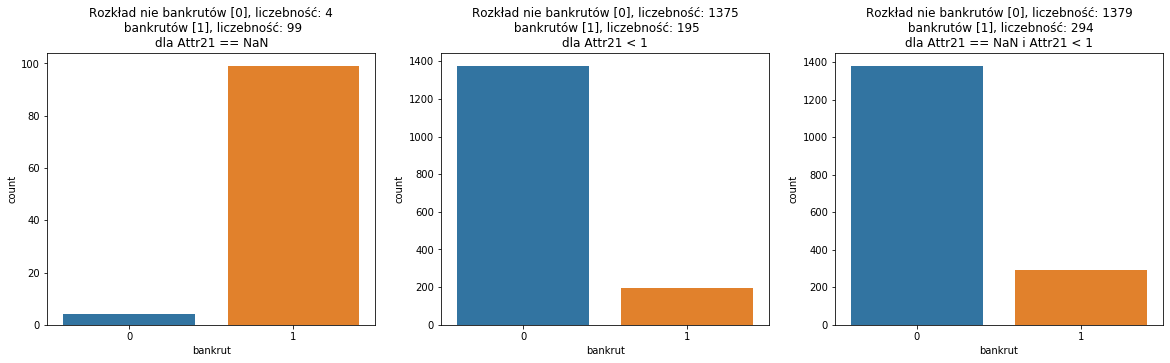

In [10]:
from seaborn import countplot

f, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
countplot(df.bankrut.loc[list(df.query('Attr21 != Attr21').index)], ax = ax[0])
countplot(df.bankrut.loc[list(df.query('Attr21 < 1').index)], ax = ax[1])
countplot(df.bankrut.loc[list(df.query('Attr21 != Attr21 | Attr21 < 1').index)], ax = ax[2])

ax[0].set_title('Rozkład nie bankrutów [0], liczebność: {}\n bankrutów [1], liczebność: {}\ndla Attr21 == NaN'.format(
df.bankrut.loc[list(df.query('Attr21 != Attr21').index)].value_counts()[0],
df.bankrut.loc[list(df.query('Attr21 != Attr21').index)].value_counts()[1]))

ax[1].set_title('Rozkład nie bankrutów [0], liczebność: {}\n bankrutów [1], liczebność: {}\ndla Attr21 < 1'.format(
df.bankrut.loc[list(df.query('Attr21 < 1').index)].value_counts()[0],
df.bankrut.loc[list(df.query('Attr21 < 1').index)].value_counts()[1]))

ax[2].set_title('Rozkład nie bankrutów [0], liczebność: {}\n bankrutów [1], liczebność: {}\ndla Attr21 == NaN i Attr21 < 1'.format(
df.bankrut.loc[list(df.query('Attr21 != Attr21 | Attr21 < 1').index)].value_counts()[0],
df.bankrut.loc[list(df.query('Attr21 != Attr21 | Attr21 < 1').index)].value_counts()[1]))

plt.show()

Z powyższych wykresów można wywnioskować, że najlepszym podejściem jest scalenie warunków, bowiem dość spora liczba bankrutów charakteryzuje się spadkiem sprzedaży lub brakiem danych na ten temat, przy jednoczesnym dużym udziale nie bankrutów. Taka też funkcja zostanie zaimplementowana na zbiorze.

##### dekodowanie Attr21 i usunięcie obserwacji z brakiem danych

In [11]:
df['Attr21'] = df['Attr21'].apply(lambda x: 0 if x >= 1 else 1)

Sprawdzenie ile zostanie obserwacji po usunięciu NaNów (sprawdzenie czy funkcja dobrze zadziałała)

In [12]:
print('utracone obserwacje po wyrzuceniu NaNów (po dekodowaniu Attr21):', 
      df.shape[0] - df.dropna().shape[0])
print('bankruci: {}% liczebność: {}\nnie bankruci: {}% liczebność: {}'.format(
    round(sum(df.dropna()['bankrut'] == 1)/df.dropna().shape[0]*100, 2),
    sum(df.dropna()['bankrut'] == 1),
    round(sum(df.dropna()['bankrut'] == 0)/df.dropna().shape[0]*100, 2),
    sum(df.dropna()['bankrut'] == 0)))

utracone obserwacje po wyrzuceniu NaNów (po dekodowaniu Attr21): 22
bankruci: 6.9% liczebność: 406
nie bankruci: 93.1% liczebność: 5482


Proporcja bankrutów do nie bankrutów w "okrojonej" populacji jest zbliżona do proporcji bez usuwania obserwacji z brakiem danych. <br/>Można zatem przyjąć takie rozwiązanie.

In [13]:
# usuwanie obserwacji z brakami w danych
df.dropna(inplace = True)

#### Tworzenie zmiennych, których nie ma aktualnie w bazie, a są potrzebne do estymacji modelu ogólnego<br/>
uwaga dot. specyfiki Pythona: opeartory binarne działają "element-wise", można używać operatorów binarnych, bo nie ma już obserwacji z brakami danych, w przeciwnym wypadku niezbędne byłoby wykorzystanie specjalnych funkcji.

In [14]:
# dźwignia finansowa
df['Attr63'] = (df['Attr42'])*df['Attr19']**(-1)
# usuwanie zmiennych wykorzystanych do obliczenia dźwigni finansowej (nie będą używane w dalszej analizie)
df.drop(labels = ['Attr42', 'Attr19'], axis = 1, inplace = True)
# z-score
df['Attr64'] = df['Attr3']*0.012+df['Attr6']*0.014+df['Attr7']*0.033+df['Attr8']*0.006+df['Attr9']*0.999
# zmienna binarna 1 jak zobowiązania > aktywa, 0 w p.p.
df['Attr65'] = df['Attr2'].apply(lambda x: 1 if x > 1 else 0)

tworzenie zmiennej binarnej, 1 jeżeli spółka wyplaca dywidendy, 0 w p.p. <br/>
Zmienna miała powstać poprzez odjęcie zysków zatrzymanych/aktywa od zysku netto/aktywa. Jeżeli spółka nie wypłaca dywidendy, różnica powinna wynosić 0.

In [15]:
# indeksy obserwacji, w których (zysk netto)/aktywa = (zyski zatrzymane)/aktywa
indeksy = pd.Series(df['Attr1'].index[df['Attr1'] == df['Attr6']])

# utworzenie serii składającej się z wyniku różnicy (zysk netto)/aktywa i (zyski zatrzymane)/aktywa
a = (df['Attr1']-df['Attr6']).apply(lambda x: 0 if x == 0 else 1)

# indeksy obserwacji, w których dywidenda nie była wypłacona (w celu sprawdzenia)
indeksy1 = pd.Series(a.index[a == 0])

# sprawdzenie czy to te same obserwacje
indeksy.equals(indeksy1)

True

In [16]:
# sprawdenie proporcji "1" i "0" dla nie wypłacających dywidend
print('{} spółek wypłaciło dywidendy, {} spółek nie wypłaciło dywidend\
\nniewypłacający dywidend:\n - bankruci: {}\n - nie bankruci: {}'.format(
    a.value_counts()[1], a.value_counts()[0],
    df['bankrut'].loc[indeksy].value_counts()[1], df['bankrut'].loc[indeksy].value_counts()[0]))

5781 spółek wypłaciło dywidendy, 107 spółek nie wypłaciło dywidend
niewypłacający dywidend:
 - bankruci: 99
 - nie bankruci: 8


Z powyższej analizy wynika, że tylko 107 spółek nie wypłacałoby dywidendy, co jest dość nieprawdopodobne, ponadto tylko 8 z tych spółek okazało się nie bankrutami. Taka struktura sugeruje, że ujęty w bazie danych zysk zatrzymany może zawierać w sobie zysk zatrzymany z lat ubiegłych powiększony o zysk zatrzymany z roku obrotowego, z którego jest analizowane sprawozdanie, albo jeszcze jakieś inne pozycje. Nie można zatem wykorzystać takiej interakcji w sposób, w jaki było to pierwotnie zaplanowane. Pomysł o utworzeniu zmiennej, mówiącej o tym czy spółka wypłaciła dywidendę zostaje zatem porzucony.

#### Dobór próby

Zmijewski (1984) zwrócił uwagę na niedotrzymanie założeń procedur estymacji. Głównym zarzutem było szacowanie parametrów na próbach nielosowych, czym niewątpliwie są próby wybierane na podstawie "dobierania w pary" (Altman 1968, Jinlan Ni i in. 2014) lub badania prowadzone na całej populacji (Evangelos C. Charalambakis, Ian Garrett 2018). Jednocześnie wskazał na konieczność zachowania proporcji "1" i "0" w próbie takich jak w populacji, zatem według Niego nie powinno się sztucznie bilansować próby. W celu sprawdzenia wartości predykcyjnej modelu, populacja zostanie losowo podzielona na próbę treningową i testową w proporcji 80/20. Wcześniejsze potasowanie bazy, pozwoli zachować założenie o losowości próby (w szczególności treningowej). 

In [17]:
# mapowanie prawidłowych nazw wskaźników (kolumn)
mapper = {"Attr1":"ROA", "Attr2":"Zobowiazania_Aktywa", "Attr3":"KO_Aktywa",
         "Attr4":"CurrentRatio", "Attr6":"Zzatrzymane_Aktywa",
         "Attr7":"EBIT_Aktywa", "Attr8":"WartRynk_WartKsDlugu",
         "Attr9":"Sprzedaz_Aktywa","Attr20":"RotacjaZapasow", 
          "Attr29":"Rozmiar", "Attr44":"RotacjaNaleznosci", 
          "Attr48":"EBITDA_Aktywa", "Attr56":"MarzaZyskuBrutto", 
          "Attr62":"RotacjaZobowiazan", "Attr63":"DzwigniaFinansowa", 
          "Attr64":"Zscore", 
          "Attr21":"PrzyrostSprzedazySpadek_BrakDanych", 
          "Attr65":"wyplacalnosc"}
df.rename(mapper = mapper, axis = 'columns', inplace = True)

In [18]:
# tasowanie 
df = df.sample(frac = 1, random_state = 2020)

In [19]:
# podpróbka służąca do testowania predykcji
test = df.iloc[:int(df.shape[0]*0.2), :]

# podpróbka służąca do oszacowania modelu
train = df.iloc[int(df.shape[0]*0.2):, :]

Raporty o specyfice podpróbek

In [20]:
print('train\nbankruci: {}% liczebność: {}\nniebankruci: {}% liczebność: {}'.format(
    round(sum(train['bankrut'] == 1)/train.shape[0]*100, 2),
    sum(train['bankrut'] == 1),
    round(sum(train['bankrut'] == 0)/train.shape[0]*100, 2),
    sum(train['bankrut'] == 0)))

train
bankruci: 6.54% liczebność: 308
niebankruci: 93.46% liczebność: 4403


In [21]:
print('test\nbankruci: {}% liczebność: {}\nniebankruci: {}% liczebność: {}'.format(
    round(sum(test['bankrut'] == 1)/test.shape[0]*100, 2),
    sum(test['bankrut'] == 1),
    round(sum(test['bankrut'] == 0)/test.shape[0]*100, 2),
    sum(test['bankrut'] == 0)))

test
bankruci: 8.33% liczebność: 98
niebankruci: 91.67% liczebność: 1079


#### Outliery

In [22]:
# funkcja do określenia liczby subplotów na podstawie wektora niepustych wykresów
# Autor: Maciej Odziemczyk, student, Wydział Nauk Ekonomicznych UW, maj 2020.
# funkcja zwraca obiekt typu lista [liczba wierszy, liczba kolumn].
# argumenty, dokumentacja:
#     arr - wektor, liczba niepustych wykresów (np. kolumny/wiersze z DataFrame)
#     num_of_cols - int, liczba kolumn, jaką ma mieć nasz subplot

def subplotShape(arr, num_of_cols = 4):
    if num_of_cols > arr.shape[0]:
        raise 'num_of_cols > arr'
    elif arr.shape[0] % num_of_cols != 0:
        for i in range(1, arr.shape[0]): # szukanie reszty z dzielenia
            if arr.shape[0] % num_of_cols == i:
                arr = np.append(arr, np.zeros((1, num_of_cols-i))) # dopełnienie do dzielenia bez reszty w kształcie
                arr = np.reshape(arr, (-1, num_of_cols)) # dopasowanie liczby wierszy do liczby kolumn
                return [arr.shape[0], arr.shape[1]] # lista [liczba wierszy, liczba kolumn]
                break
    else:
        arr = np.reshape(arr, (-1, num_of_cols)) # dopasowanie liczby wierszy do liczby kolumn
        return [arr.shape[0], arr.shape[1]] # lista [liczba wierszy, liczba kolumn]

In [23]:
# Atrybuty ciągłe
num = ["ROA", "Zobowiazania_Aktywa", "KO_Aktywa", "CurrentRatio",
       "Zzatrzymane_Aktywa", "EBIT_Aktywa", "WartRynk_WartKsDlugu",
       "Sprzedaz_Aktywa", "RotacjaZapasow", "Rozmiar", 
       "RotacjaNaleznosci", "EBITDA_Aktywa", "MarzaZyskuBrutto",
       "RotacjaZobowiazan", "DzwigniaFinansowa", "Zscore"]

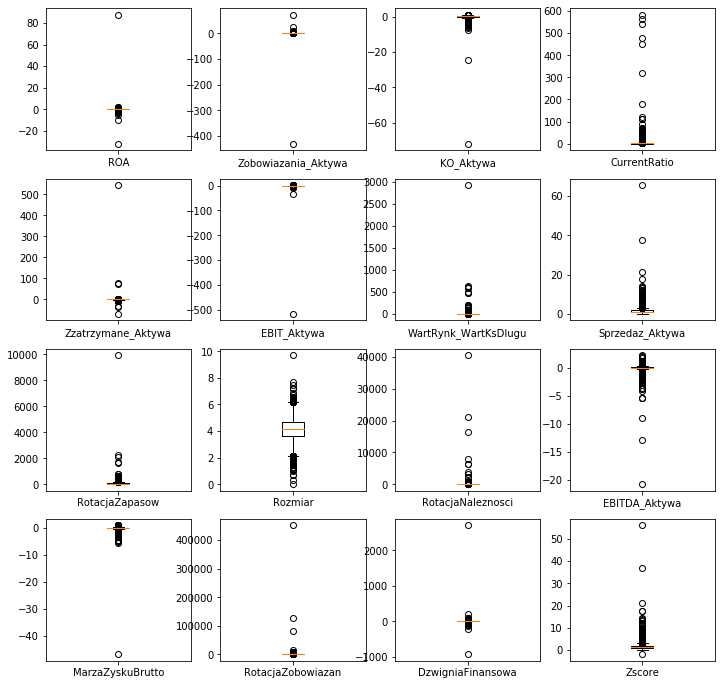

In [24]:
# skopiowanie zbioru w celu obróbki (robocza komenda, wcześniej testowane było wiele metod usuwania outlierów)
train1 = train.copy()

rozmiar = subplotShape(np.array(num), 4)

f, ax = plt.subplots(nrows = rozmiar[0], ncols = rozmiar[1], figsize = (12,12))
flag = 0
for r in range(rozmiar[0]):
    for c in range(rozmiar[1]):
        try:
            ax[r, c].boxplot(train1[num[flag]], labels = [num[flag]])
            flag += 1
        except:
            pass

plt.show()

Z analizy wykresów pudełkowych wnioskuję o występowaniu wartości nietypowych w przypadku każdej ze zmiennych, należy przyjrzeć się kilku niepokojącym obserwacjom, aby uniknąć błędnej estymacji parametrów modelu.

1. Ujemna wartość księgowa kapitału własnego (proxy wart. rynkowej) powinna iść w parze z ujemnymi zyskami zatrzymanymi.
 - Wartości najwyższe

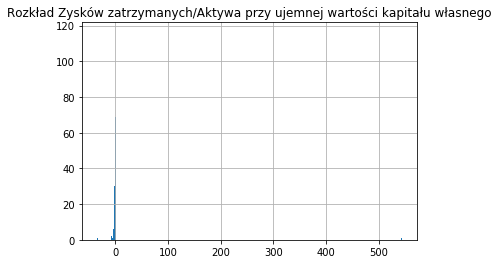

In [25]:
train1.Zzatrzymane_Aktywa.where(train1.WartRynk_WartKsDlugu<0).dropna().hist(bins = 800)
plt.title('Rozkład Zysków zatrzymanych/Aktywa przy ujemnej wartości kapitału własnego')
plt.show()

In [26]:
# lista uzupełniana na bieżąco w korespondencji z filtrem z komórki poniżej
lista = [4351, 3846, 3009, 4848, 4045, 5748, 5257, 2786, 3683, 4691, 5522, 5685, 1847, 3775, 1589]

# do usunięcia:
# 4351, 3846 

In [27]:
# filtr
train1.drop(labels = lista).where(
    train1.Zzatrzymane_Aktywa == train1.drop(labels = lista).Zzatrzymane_Aktywa.where(
        train1.WartRynk_WartKsDlugu < 0).dropna().max()).dropna()

,ROA,Zobowiazania_Aktywa,KO_Aktywa,CurrentRatio,Zzatrzymane_Aktywa,EBIT_Aktywa,WartRynk_WartKsDlugu,Sprzedaz_Aktywa,RotacjaZapasow,PrzyrostSprzedazySpadek_BrakDanych,Rozmiar,RotacjaNaleznosci,EBITDA_Aktywa,MarzaZyskuBrutto,RotacjaZobowiazan,bankrut,DzwigniaFinansowa,Zscore,wyplacalnosc
623,0.079916,0.318460,0.608990,2.9123,0.0,0.103410,2.14010,2.27950,40.0790,0.0,3.4051,86.398,0.108190,0.055251,50.994,0.0,1.209082,2.300782,0.0
5174,0.108310,0.672800,0.288420,1.4287,0.0,0.108310,0.48633,0.82943,63.2430,0.0,3.4373,189.460,-0.010500,0.463340,296.070,0.0,0.000000,0.838554,0.0
3539,0.124940,0.674440,0.047192,1.1218,0.0,0.124940,0.48271,1.56190,8.3184,0.0,3.6291,89.228,-0.107140,0.247270,90.554,0.0,0.000000,1.567924,0.0
1136,0.056304,0.617900,0.127120,1.3529,0.0,0.075093,0.61839,1.97710,24.4150,0.0,4.6542,61.245,0.070890,0.069040,66.508,0.0,1.658145,1.982837,0.0
2290,0.009464,0.583720,0.115730,1.3261,0.0,0.013644,0.71315,0.90052,124.9200,0.0,4.5269,33.764,-0.017715,0.044959,143.820,0.0,3.127846,0.905737,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,0.030486,0.154880,0.555980,4.7513,0.0,0.030486,5.45680,2.00730,24.5080,0.0,3.7021,96.672,-0.009491,0.005749,26.951,0.0,0.744864,2.045711,0.0
1998,0.132210,0.073515,0.365500,6.1723,0.0,0.132210,12.60300,0.95924,80.6640,0.0,4.0842,34.418,-0.033320,0.197080,26.888,0.0,0.000000,1.042648,0.0
1663,0.134370,0.570230,0.241480,1.7930,0.0,0.134370,0.75369,1.32720,19.9570,0.0,3.8855,92.875,0.057433,0.050165,83.747,0.0,1.021138,1.337727,0.0
2145,0.182360,0.236890,0.785750,5.2085,0.0,0.226720,3.22130,1.92420,79.8160,0.0,4.1152,73.020,0.201610,0.119330,35.416,0.0,0.955950,1.958514,0.0


4351 - Absurdalnie wysokie ROA, ujemne zobowiązania przy znacznej różnicy Kapitalu obrotowego_aktywa i current ratio, absurdalnie niski ebit ponad 20 krotnie niższy niż EBITDA (oznacza, że musi być duża amortyzacja, jednak ROA to ponad 87, aktywa nie mogą być wyskoie w tym przypadku, bo oznaczało by to absurdalnie wysoki zysk, co przy EBIT -500 jest absurdem). To zdecydowanie jest obserwacja błędna. <br/>
3846 - Zachowane racjonalne proporcje między ROA, EBIT i EBITDA, ujemna WartRynk koresponduje ze stosunkiem Zobowiązań do aktywów bliskim 5, przy stosunku zysków zatrzymanch do aktywów ponad 3, jest to dość nieprawdopodobna wartość, bowiem mało prawdopodobne jest, aby przekraczała ona 1. Dodatkowo widzimy, że sprzedaż stanowi 66% aktywów, co przy ujemnej marży oznacza, że spółka nie powinna generować zysków na działalności operacyjnej, bowiem koszty sprzedanych produktów przewyższają przychody ze sprzedaży. Dokładając rotację zobowiązań na poziomie blisko 17 lat nie można stwierdzić pogorszenia sytuacji na przestrzeni roku bilansowego (dodatkowo 17 letni okres rotacji zobowiązań wygląda raczej jak pomyłka). Dźwignia finansowa > 1 sugeruje nadwyżkę przychodów finansowych i zysków nadzywczajnych nad kosztami finansowymi, jednak jest to zaledwie 4%. Przy takiej marży, niemożliwe jest osiągnąć ROA na poziomie 28%, ta obsrwacja wydaje się być wysoce nieprawdopodobna, należy ją usunąć.

 - Wartości najniższe

In [28]:
# lista uzupełniana na bieżąco w korespondencji z filtrem z komórki poniżej
lista = [1672, 5613, 3100, 2348, 5680, 3802, 5530, 4509, 4136, 3103, 5515, 5775, 5898, 5820, 5885, 5571]

# do usunięcia:
# 1672, 2348, 3802

In [29]:
# filtr
train1.drop(labels = lista).where(
    train1.Zzatrzymane_Aktywa == train1.drop(labels = lista).Zzatrzymane_Aktywa.where(
        train1.WartRynk_WartKsDlugu < 0).dropna().min()).dropna()

,ROA,Zobowiazania_Aktywa,KO_Aktywa,CurrentRatio,Zzatrzymane_Aktywa,EBIT_Aktywa,WartRynk_WartKsDlugu,Sprzedaz_Aktywa,RotacjaZapasow,PrzyrostSprzedazySpadek_BrakDanych,Rozmiar,RotacjaNaleznosci,EBITDA_Aktywa,MarzaZyskuBrutto,RotacjaZobowiazan,bankrut,DzwigniaFinansowa,Zscore,wyplacalnosc
1859,-0.049813,3.6858,0.1102,1.8834,-3.2385,-0.049813,-0.72869,1.0803,3.605,0.0,3.2653,68.595,0.047823,0.067789,42.151,0.0,-1.385491,1.029187,1.0


1672 - To, że przy takich wskaźnikach firma nie jest zaklasyfikowana jako bankrut wydaje się być błędem w danych. Należy ją usunąć ze zbioru obserwacji.  <br/>
2348 - Obserwacja wygląda tak, jakby etykieta była pomylona, należy usunąć obserwację. <br/>
3802 - Obserwacja wygląda tak, jakby etykieta była pomylona, należy usunąć obserwację.

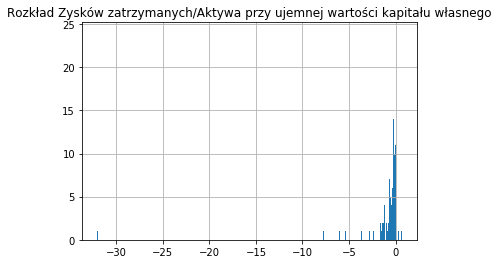

In [30]:
# usunięcie obserwacji zdiagnozowanych jako niepoprawne 
bye = [4351, 3846, 1672, 2348, 3802]
train1.drop(bye, inplace = True)

# sprawdzenie histogramu
train1.Zzatrzymane_Aktywa.where(train1.WartRynk_WartKsDlugu < 0).dropna().hist(bins = 800)
plt.title('Rozkład Zysków zatrzymanych/Aktywa przy ujemnej wartości kapitału własnego')
plt.show()

 - Dodatkowe obserwacje - dziwne zachowanie trójki, EBITDA, EBIT, ROA.

In [31]:
print('liczba obserwacji w przypadku:\
\nEBIT > EBITDA: {}\
\nROA > EBITDA: {}\
\nROA > EBIT: {}'.format(
df.where(df.EBIT_Aktywa > df.EBITDA_Aktywa).dropna().shape[0],
df.where(df.ROA > df.EBITDA_Aktywa).dropna().shape[0],
df.where(df.ROA > df.EBIT_Aktywa).dropna().shape[0]))

liczba obserwacji w przypadku:
EBIT > EBITDA: 4673
ROA > EBITDA: 3958
ROA > EBIT: 498


W 4673 przypadkach EBIT > EBITDA, biorąc pod uwagę definicje obu wskaźników, taka sytuacja nie jest możliwa na taką skalę. W bazie danych EBIT nie został dokładnie opisany, natomiast EBITDA została opisana jako zysk na działalności operacyjnej - deprecjacja. Z uwagi na fakt braku opisu formuły EBITu oraz wyników powyższej analizy nie mozna uznać porównania EBIT i EBITDA jako element dalszych analiz, ze względu niepewność co do poprawności atrybutów. Należy zatem usunąć jedną ze zmiennych z bazy danych. Z uwagi na fakt że w 3958 przypadkach ROA > EBITDA, można wysnuć wniosek, że wskaźnik EBITDA jest w przypadku niniejszej bazy danych osobliwy i należy się go pozbyć ze zbioru zmiennych objaśniających. ROA wyższe od EBIT jest możliwe w przypadku występowania zysków nadzwyczajnych, zatem jeżeli taka sytuacja występuje w blisko 12% przypadków, można uznać ją za prawdopodobną.

2. Sprawdzenie obserwacji z dużą nadwyżką zobowiązań nad aktywami.

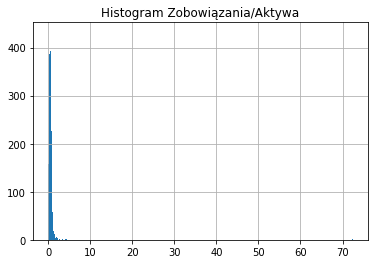

In [32]:
train1.Zobowiazania_Aktywa.hist(bins = 1100)
plt.title('Histogram Zobowiązania/Aktywa')
plt.show()

Jest obsrewacja z bardzo wysokim wskaźnikiem, należy ją sprawdzić.

In [33]:
train1.where(train1.Zobowiazania_Aktywa == train1.Zobowiazania_Aktywa.max()).dropna()

,ROA,Zobowiazania_Aktywa,KO_Aktywa,CurrentRatio,Zzatrzymane_Aktywa,EBIT_Aktywa,WartRynk_WartKsDlugu,Sprzedaz_Aktywa,RotacjaZapasow,PrzyrostSprzedazySpadek_BrakDanych,Rozmiar,RotacjaNaleznosci,EBITDA_Aktywa,MarzaZyskuBrutto,RotacjaZobowiazan,bankrut,DzwigniaFinansowa,Zscore,wyplacalnosc
5613,-32.052,72.416,-72.067,0.004819,-32.052,-32.09,-0.98657,0.43456,25.406,1.0,3.2657,17.525,-2.5956,-1.3012,9090.5,1.0,0.077856,-1.944296,1.0


5613 - Nie potrafię wyjaśnić przypadku, w którym cykl rotacji zobowiązań trwa 25 lat, a zobowiązania przekraczają aktywa 72 krotnie, dodatkowo wnioskując, że większość z nich to zobowiązania krótkoterminowe (current ratio ok 0, KO_Aktywa -72, dodatkowo cykl rotacji zobowiązań odnosi się do zobowiązań handlowych - z definicji krótkoterminowych). Należy usunąć obserwację.

In [34]:
# lista uzupełniana na bieżąco w korespondencji z filtrem z komórki poniżej
lista = [5613, 3100, 5898, 4136, 5877, 5775, 5885, 3103, 4558, 5530, 1870, 5818, 5820, 5515, 4897, 1859, 765, 5571,
        5785, 3178, 5848, 677, 5789, 5836, 815, 5718, 5748, 5748, 5713, 3831, 5645, 4727, 5685, 5685, 2152, 5654, 
        3077, 3906, 2740, 5710, 5698, 5545, 3360, 2557]

# do usunięcia:
# 5613, 3103, 5515

In [35]:
# filtr
train1.drop(lista).where(
    train1.Zobowiazania_Aktywa == train1.drop(lista).Zobowiazania_Aktywa.max()).dropna()

,ROA,Zobowiazania_Aktywa,KO_Aktywa,CurrentRatio,Zzatrzymane_Aktywa,EBIT_Aktywa,WartRynk_WartKsDlugu,Sprzedaz_Aktywa,RotacjaZapasow,PrzyrostSprzedazySpadek_BrakDanych,Rozmiar,RotacjaNaleznosci,EBITDA_Aktywa,MarzaZyskuBrutto,RotacjaZobowiazan,bankrut,DzwigniaFinansowa,Zscore,wyplacalnosc
3403,-0.3071,1.9614,-1.1747,0.40106,-1.356,-0.3071,-0.4906,0.92284,154.73,1.0,4.0122,38.41,-0.34443,-0.083615,511.12,0.0,0.894828,0.875759,1.0


3103 - wskaźniki wyglądają jak pomyłka dla nie bankruta<br/>
4558 - jw <br/>
1870 - rosnąca sprzedaż, wysoka marża, wysoka sprzedaż, niezłe inkaso należności, można zostawić obserwację jako nie bankruta <br/>
5515 - absuradle wyniki wskaźników rotacji, zobowiązania - 1236 lat, to nie może być prawda, pomimo że jest to bankrut :)<br/>
4897 - strata dorównująca aktywom, zerowa płynność, ujemna marża przy wzroście sprzedaży, jeżleli ta spółka nie upadła, to coś jest nie tak z danymi. Usuwamy <br/>

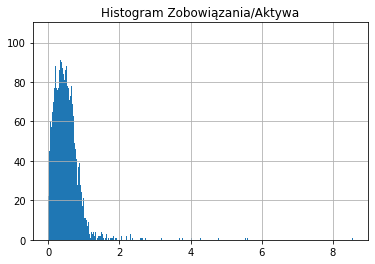

In [36]:
# usunięcie obserwacji błędnych wykrytych przy analizie pokrycia zobowiązaniami aktywów
bye = [5613, 3103, 5515]
train1.drop(bye, inplace = True)

# sprawdzenie histogramu
train1.Zobowiazania_Aktywa.hist(bins = 600)
plt.title('Histogram Zobowiązania/Aktywa')
plt.show()

3 .Często błędy pojawialy się przy wskaźniach rotacji, należy je sprawdzić.<br/>
 - Rotacja Należności.

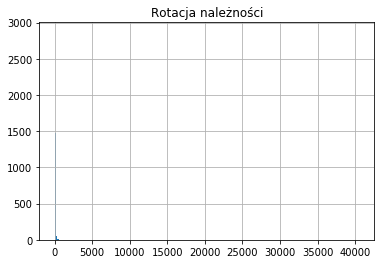

In [37]:
train1.RotacjaNaleznosci.hist(bins = 600)
plt.title('Rotacja należności')
plt.show()

Zdecydowanie skala na osi jest zbyt duża, aby była racjonalna, trzeba sprawdzić wartości maksymalne.

In [38]:
# lista uzupełniana na bieżąco w korespondencji z filtrem z komórki poniżej
lista = [1553, 5808, 5631, 5759, 915, 3112, 4744, 4774, 2444, 2588, 3715, 3824]

# do usunięcia:
# 1553, 5808, 5631, 5759, 915, 3112, 4744, 4774, 2444, 2588, 3715, 3824

In [39]:
# filtr
train1.drop(lista).where(
    train1.RotacjaNaleznosci == train1.drop(lista).RotacjaNaleznosci.max()).dropna()

,ROA,Zobowiazania_Aktywa,KO_Aktywa,CurrentRatio,Zzatrzymane_Aktywa,EBIT_Aktywa,WartRynk_WartKsDlugu,Sprzedaz_Aktywa,RotacjaZapasow,PrzyrostSprzedazySpadek_BrakDanych,Rozmiar,RotacjaNaleznosci,EBITDA_Aktywa,MarzaZyskuBrutto,RotacjaZobowiazan,bankrut,DzwigniaFinansowa,Zscore,wyplacalnosc
2163,-0.029495,0.82617,0.097451,1.4921,0.0,-0.029495,0.2104,0.1399,0.0,0.0,3.0501,705.98,-0.064623,0.01477,516.71,0.0,-0.070085,0.141219,0.0


1553 - 111 lat inkasa należności. usuwamy <br/>
5808 - 45 lat inkasa należności + 36 lat przeciętnej rotacji zobowiązan. usuwamy <br/>
5631 - 21 lat inkasa należności. usuwamy <br/>
5759 - 17 lat inkasa należności + 22 lata rotacji zobowiązań. usuwamy <br/>
915 - 17 lat inkasa należności. usuwamy <br/>
3112 - 10 lat inkasa należności. usuwamy <br/>
4744 - 9 lat inkasa należności. usuwamy <br/>
4744 - 9 lat inkasa należności, 219 lat rotacji zobowiązań. usuwamy <br/>
2444 - 6,5 lat inkasa należności. usuwamy <br/>
2588 - 6 lat inkasa należności. usuwamy <br/>
3715 - 5,5 roku inkasa należności, 11 lat rotacji zobowiązań. usuwamy

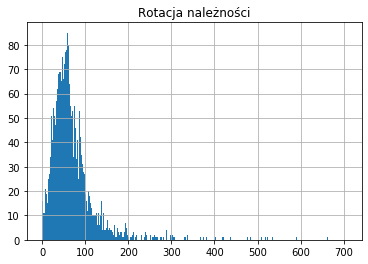

In [40]:
# usunięcie obserwacji uznanych za nieprawidłowe
bye = [1553, 5808, 5631, 5759, 915, 3112, 4744, 4774, 2444, 2588, 3715, 3824, 3077] # 3077?
train1.drop(bye, inplace = True)

# sprawdzenie histogramu
train1.RotacjaNaleznosci.hist(bins = 600)
plt.title('Rotacja należności')
plt.show()

 - Rotacja zobowiązań.

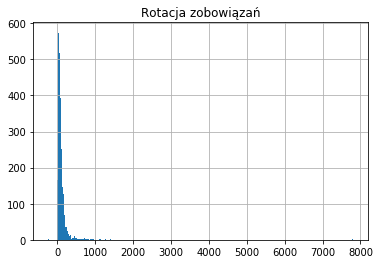

In [41]:
train1.RotacjaZobowiazan.hist(bins = 600)
plt.title('Rotacja zobowiązań')
plt.show()

Poza badzo dużymi wartościami, widać też obserwację z ujemną rotacją zobowiązan.

In [42]:
# lista uzupełniana na bieżąco w korespondencji z filtrem z komórki poniżej
lista = [5681, 5598, 5718, 337, 5865, 3767, 5639, 4118, 5773]

# do usunięcia:
# 5681, 5598, 5718, 337, 5865, 3767, 5639, 4118, 5773

In [43]:
# filtr
train1.drop(lista).where(
    train1.RotacjaZobowiazan == train1.drop(lista).RotacjaZobowiazan.max()).dropna()

,ROA,Zobowiazania_Aktywa,KO_Aktywa,CurrentRatio,Zzatrzymane_Aktywa,EBIT_Aktywa,WartRynk_WartKsDlugu,Sprzedaz_Aktywa,RotacjaZapasow,PrzyrostSprzedazySpadek_BrakDanych,Rozmiar,RotacjaNaleznosci,EBITDA_Aktywa,MarzaZyskuBrutto,RotacjaZobowiazan,bankrut,DzwigniaFinansowa,Zscore,wyplacalnosc
2623,-0.20097,1.3318,-0.48012,0.61873,-0.17871,-0.22562,-0.24914,0.32792,764.72,1.0,3.4533,15.88,-0.08799,-0.18441,1401.7,0.0,0.291208,0.310388,1.0


5681 - ujemna rotacja zobowiązań. usuwamy <br/>
5598 - 21 lat rotacji zobowiązań. usuwamy <br/>
5718 - 14 lat rotacji zobowiązań. usuwamy <br/>
337 - 9 lat rotacji zobowiązań. usuwamy <br/>
5865 - 8.5 roku rotacji zobowiązań. usuwamy <br/>
3767 - 7.5 roku robacji zobowiązań. usuwamy <br/>
5639 - 6.5 roku rotacji zobowiązań. usuwamy <br/>
4118 - 5.5 roku rotacji zobowiązań. usuwamy <br/>
5773 - 4 lata rotacji zobowiązań. usuwamy.

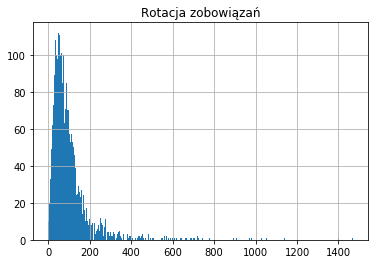

In [44]:
# usunięcie obserwacji uznanych za nieprawidłowe
bye = [5681, 5598, 5718, 337, 5865, 3767, 5639, 4118]
train1.drop(bye, inplace = True)

# sprawdzenie histogramu
train1.RotacjaZobowiazan.hist(bins = 600)
plt.title('Rotacja zobowiązań')
plt.show()

 - Rotacja zapasów.

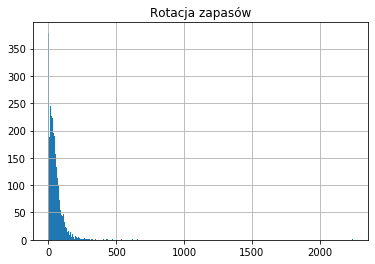

In [45]:
train1.RotacjaZapasow.hist(bins = 600)
plt.title('Rotacja zapasów')
plt.show()

In [46]:
# lista uzupełniana na bieżąco w korespondencji z filtrem z komórki poniżej
lista = [3775, 5822, 2623, 4060, 2288, 89, 5537]

# do usunięcia:
# 3775, 5822, 2623, 4060, 2288, 89, 5537

In [47]:
# filtr
train1.drop(lista).where(
    train1.RotacjaZapasow == train1.drop(lista).RotacjaZapasow.max()).dropna()

,ROA,Zobowiazania_Aktywa,KO_Aktywa,CurrentRatio,Zzatrzymane_Aktywa,EBIT_Aktywa,WartRynk_WartKsDlugu,Sprzedaz_Aktywa,RotacjaZapasow,PrzyrostSprzedazySpadek_BrakDanych,Rozmiar,RotacjaNaleznosci,EBITDA_Aktywa,MarzaZyskuBrutto,RotacjaZobowiazan,bankrut,DzwigniaFinansowa,Zscore,wyplacalnosc
559,-0.19325,0.44967,0.049913,1.2313,-0.000533,-0.19325,1.2238,0.16282,470.75,1.0,3.5337,71.676,-0.2548,-1.925,483.75,0.0,0.936894,0.164214,0.0


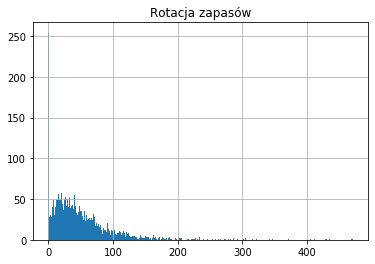

In [48]:
# usunięcie obserwacji uznanych za nieprawidłowe
bye = [3775, 5822, 2623, 4060, 2288, 89, 5537]
train1.drop(bye, inplace = True)

# sprawdzenie histogramu
train1.RotacjaZapasow.hist(bins = 600)
plt.title('Rotacja zapasów')
plt.show()

4. Inne "dziwne obserwacje" 

In [49]:
train1.where(train1.WartRynk_WartKsDlugu == train1.WartRynk_WartKsDlugu.max()).dropna()

,ROA,Zobowiazania_Aktywa,KO_Aktywa,CurrentRatio,Zzatrzymane_Aktywa,EBIT_Aktywa,WartRynk_WartKsDlugu,Sprzedaz_Aktywa,RotacjaZapasow,PrzyrostSprzedazySpadek_BrakDanych,Rozmiar,RotacjaNaleznosci,EBITDA_Aktywa,MarzaZyskuBrutto,RotacjaZobowiazan,bankrut,DzwigniaFinansowa,Zscore,wyplacalnosc
4265,0.000289,0.000342,0.003491,16.831,-0.20989,0.000353,2922.0,0.000191,0.0,0.0,5.7901,535.13,-0.002904,0.94915,420.68,0.0,-8.215426,17.529306,0.0


Bardzo małe zadłużenie - zatem jest to wytłumaczalna obserwacja. <br/>
W toku analizy stwierdzono, że dźwignia finansowa nie jest zmienną na tyle istotną, aby umieszczać ją w modelu ogólnym, a tym bardziej na jej podstawie usuwać obserwacje<br/>
**Wykresy pudełkowe po oczyszczaniu**

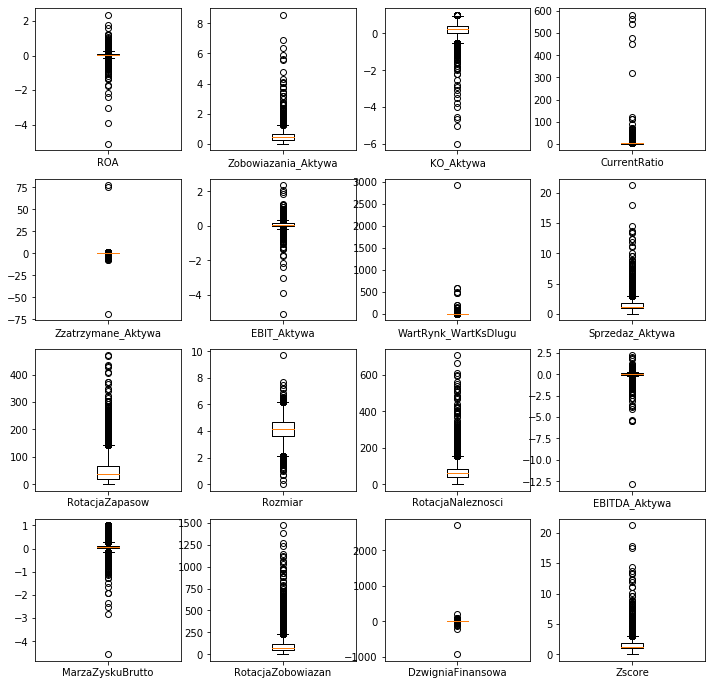

train1
bankruci: 6.33% liczebność: 296
niebankruci: 93.67% liczebność: 4379


In [50]:
rozmiar = subplotShape(np.array(num), 4)

f, ax = plt.subplots(nrows = rozmiar[0], ncols = rozmiar[1], figsize = (12, 12))
flag = 0
for r in range(rozmiar[0]):
    for c in range(rozmiar[1]):
        try:
            ax[r, c].boxplot(train1[num[flag]], labels = [num[flag]])
            flag += 1
        except:
            pass

plt.show()


print('train1\nbankruci: {}% liczebność: {}\nniebankruci: {}% liczebność: {}'.format(
    round(sum(train1['bankrut'] == 1)/train1.shape[0]*100, 2),
    sum(train1['bankrut'] == 1),
    round(sum(train1['bankrut'] == 0)/train1.shape[0]*100, 2),
    sum(train1['bankrut'] == 0)))

#### Testowanie różnic średnich między populacjami

In [51]:
# funkcja do liczenia statystyki porównującej dwie populacje.
# Autor: Maciej Odziemczyk, student, Wydział Nauk Ekonomicznych UW, maj 2020.
# funkcja zwraca statystykę, wartość krytyczną i p_value dla H0: mi1 = mi2 i HA dwustronnej mi != m2, lub HA jednostronnej
    # mi1 > mi2. W celu przetestowania HA mi1 < mi2, należy przy podawaniu argumentów zamienić wektory miejscami. 
# argumenty, dokumentacja:
#     a i b to realizacje obsewracji z dwóch populacji, powinny być podane jako wektory numpy
#     alfa - poziom ufności (0;1)
#     alternative - wybór hipotezy alternatywnej, 'two-sided' - HA: mia != mib, 'one-sided' - HA: mia > mib

def popMeanTest(a, b, alfa = 0.05, alternative = 'two-sided'):
    # import rozkładu normalnego
    from scipy.stats import norm
    
    # statystyka testowa
    stat = (a.mean()-b.mean())/(((a.var()/a.shape[0])+(b.var()/b.shape[0]))**(1/2))
    
    # wartość krytyczna i p_value dla wybranej hipotezy alternatywnej
    if alternative == 'two-sided':
        critical_value = norm.ppf(q = 1-alfa/2)
        p = 2*(1-norm.cdf(abs(stat)))  
    elif alternative == 'one-sided':
        critical_value = norm.ppf(q = 1-alfa)
        p = 1-norm.cdf(abs(stat))
    else:
        raise 'niepoprawny wynik, sprawdź argumenty'
    
    # zwrócenie wyników
    return stat, critical_value, p      

In [52]:
# skopiowanie oczyszczonego train1 do train
train = train1.copy()

In [53]:
# podzielenie próbki na bankrutów i niebankrutów

# sortowanie 
train = train.sort_values(by = 'bankrut', axis = 0)

# podział
niebankruci = train.iloc[:train.sort_values(by = 'bankrut', axis = 0).bankrut.value_counts()[0], :]
bankruci = train.iloc[train.sort_values(by = 'bankrut', axis = 0).bankrut.value_counts()[0]:, :]

In [54]:
# listy, w których będą zapisane wyniki
stats = []
critics = []
pvals = []
atr = []

for n in num:
    # testowanie
    s, crt, p = popMeanTest(np.array(bankruci[n]), np.array(niebankruci[n]), alternative='two-sided')
    # zapisanie wyników
    stats.append(s)
    critics.append(crt)
    pvals.append(round(p, 5))
    atr.append(n)
    
# zapisanie wyników do obiektu DataFrame
srednie = pd.DataFrame(data = {"zmienna":atr, "U":stats, "wartość krytyczna":critics, "p_value":pvals})

# usunięcie z obiektu zmiennych z p < 0.05
srednie = srednie.where(srednie['p_value'] > 0.05).dropna()

# porządkowanie indeksów
srednie.reset_index(inplace = True, drop = True)

# wyświetlenie wyników
display(srednie)

,zmienna,U,wartość krytyczna,p_value
0,CurrentRatio,-0.016867,1.959964,0.98654
1,WartRynk_WartKsDlugu,-0.812942,1.959964,0.41625
2,RotacjaZapasow,1.643559,1.959964,0.10027
3,RotacjaNaleznosci,-0.057591,1.959964,0.95407
4,DzwigniaFinansowa,-0.409450,1.959964,0.68221


Z powyższej analizy wynika, że średnie dla podpróbek są statystycznie takie same dla zmiennych: Current Ratio, Wartość rynkowa/wartość księgowa długu, Rotacja zapasów i Rotacja należności (alfa 5). Można zatem spodziewać się nieistotności tych zmiennych. 

#### Macierz korelacji Spearmana (zmienne nie mają rozkładów normalnych)

In [55]:
# import funkcji do liczenia korelacji spearmana i p_value
from scipy.stats import spearmanr

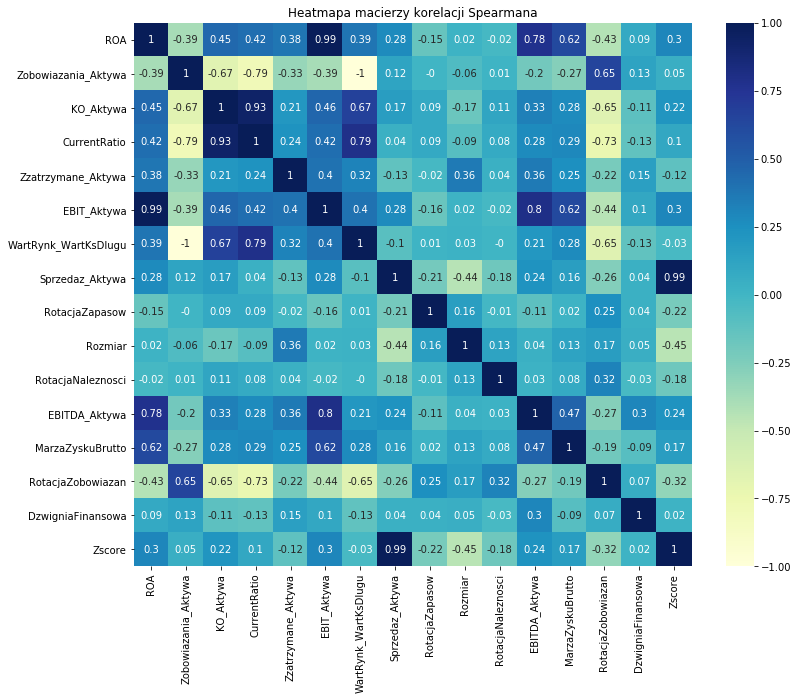

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12.5,10))


correl = np.round(train[num].corr(method = 'spearman'), 2)
sns.heatmap(correl, cmap="YlGnBu", annot=True, cbar=True)
plt.title('Heatmapa macierzy korelacji Spearmana')
plt.show()

In [57]:
# obliczenie korelacji spearmana i p_value (wartościowe, w przypadku prób > 500 obserwacji - spełnione)
# H0: zmienne są nieskorelowane

# obliczenie współczynnika i p_value, zaokraglonych do 7 miejsca po przecinku (wcześniej korelacja np. a z a = 0.999999998)
coef, p = np.round(spearmanr(train[num]),7)

# zapis statystyki do obiektu DataFrame
spearman = pd.DataFrame(coef, index = train[num].columns.tolist(), columns = train[num].columns.tolist())

# zapis p_value do obiektu DataFrame
p_value = pd.DataFrame(np.round(p,5), index = train[num].columns.tolist(), columns = train[num].columns.tolist())

# listy, w których będą przechowywane informacje
zmienna1 = []
zmienna2 = []
korelacja = []
p = []

# poziom korelacji, powyżej którego chcę mieć informacje
b = 0.8

for i in range(spearman.shape[0]):
    for j in range(spearman.shape[0]):
        
        # warunek (nie chcę korelacji zmiennych między nimi samymi)
        if np.abs(spearman.iloc[i,j]) >= b and spearman.iloc[i,j] != 1.0:
            
            # zapis wyników do list
            zmienna1.append(spearman.iloc[:, j].name)
            zmienna2.append(spearman.index[i])
            korelacja.append(spearman.iloc[i,j])
            p.append(p_value.iloc[i,j])

# tworzenie obiektu data frame z list wynikowych
spearmanRes = pd.DataFrame({'zmienna1':zmienna1, "zmienna2":zmienna2, "korelacja":korelacja, "p_value":p})

# usuwanie duplikatów ze względu na korelację (możliwe dwukrotne ujęcie tej samej zależności)
spearmanRes.drop_duplicates(subset = 'korelacja', inplace = True)

# porządkowanie indeksów
spearmanRes.reset_index(inplace = True, drop = True)

# wyświetlenie wyników
print('Zmienne skorelowane >= {}'.format(b))
display(spearmanRes)

Zmienne skorelowane >= 0.8


,zmienna1,zmienna2,korelacja,p_value
0,EBIT_Aktywa,ROA,0.986642,0.0
1,WartRynk_WartKsDlugu,Zobowiazania_Aktywa,-0.995572,0.0
2,CurrentRatio,KO_Aktywa,0.925328,0.0
3,EBITDA_Aktywa,EBIT_Aktywa,0.802079,0.0
4,Zscore,Sprzedaz_Aktywa,0.986159,0.0


Z tabeli można zauważyć, że wszystkie współczynniki są istotne statystycznie <br/>
**Scatterploty**, w celu lepszego zobrazowania wyników.

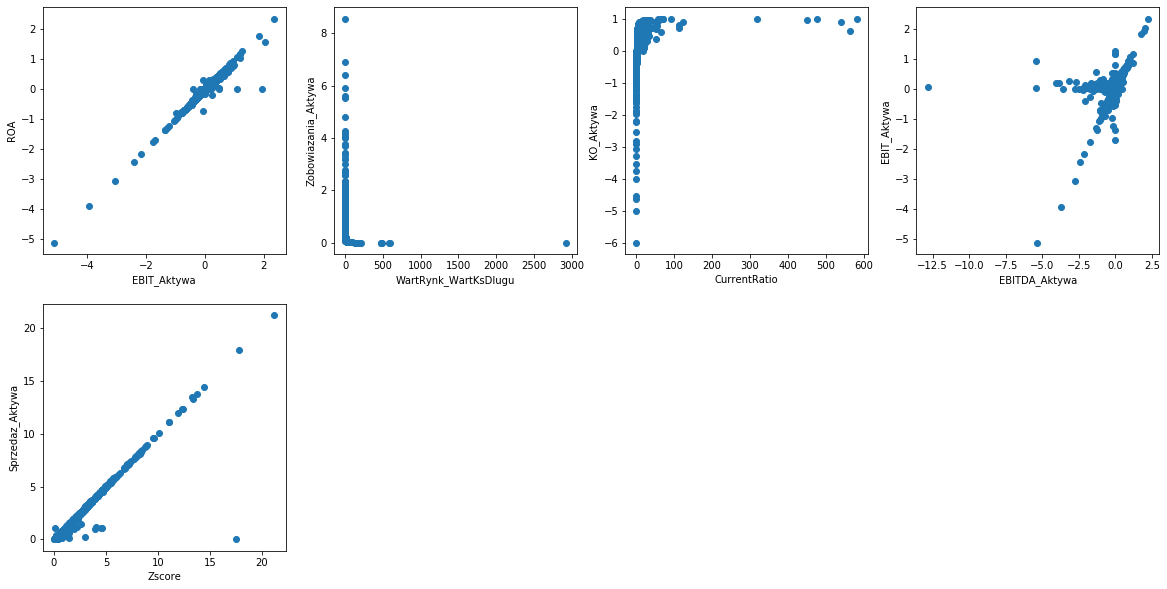

In [58]:
rozmiar = subplotShape(spearmanRes.zmienna1, 4)

f, ax = plt.subplots(nrows = rozmiar[0], ncols = rozmiar[1], figsize = (20,10))
flag = 0
for r in range(rozmiar[0]):
    for c in range(rozmiar[1]):
        ax[r, c].set_visible(False)
        try:
            ax[r, c].scatter(train[spearmanRes.iloc[flag,0]], train[spearmanRes.iloc[flag,1]])
            ax[r, c].set_xlabel(spearmanRes.iloc[flag,0])
            ax[r, c].set_ylabel(spearmanRes.iloc[flag,1])
            flag += 1
            ax[r, c].set_visible(True)
        except:
            pass
plt.show()

Zrzutowanie wyników daje dodatkowy pogląd na rodzaj zależności między zmiennymi, bowiem współczynnik Spearmana wykrywa również nieliniowości.<br/>
1. Liniowe zależności:
 - ROA i EBIT/Aktywa
 - EBIT/Aktywa i EBITDA/Aktywa
 - Sprzedaż/Aktywa i Zscore
2. Nieliniowe zależności:
 - Zobowiązania/Aktywa i Wartość rynkowa/Wartość księgowa długu
 - Kapitał obrotowy/Aktywa i Current ratio

Wyniki utwierdzają w przekonaniu o nieprzydatności zmiennej EBITDA/Aktywa. Nie zostanie ona zatem ujęta w modelu ogólnym. Dodatkowo, można spodziewać się wysokiej inflacji wariancji w przypadku pozostawienia zmiennych ROA i EBIT/Aktywa. Warto to sprawdzić.

#### Wskaźnik inflacji wariancji
Źródło:<br/>
http://sigmaquality.pl/uncategorized/multicollinearity-w-regresji-logistycznej-vif-pl202001081905

In [59]:
# import bibliotek i funkcji
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

In [60]:
# lista zmiennych - do formuły
zmienne = train.columns.tolist()

# usunięcie z listy zmiennej zależnej, zmiennej Altmana oraz zdiagnozowanej jako niepoprawną - EBITDA
zmienne.remove('bankrut')
zmienne.remove('Zscore')
zmienne.remove('EBITDA_Aktywa')

# formuła
formula = 'bankrut~{}+I(Rozmiar**2)+wyplacalnosc:PrzyrostSprzedazySpadek_BrakDanych'.format('+'.join(zmienne))

In [61]:
# model odporny na heteroskedastyczność
lm = smf.ols(formula = formula, data = train).fit(cov_type = 'HC0')

# macierz X i VIF
y, X = dmatrices(formula, data = train, return_type = "dataframe")
vif = np.round([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], 2)

# przystosowanie wyników do wyświetlenia
vif = list(map(float, vif))
name = list(X)

s1 = pd.Series(name, name = 'Zmienna')
s2 = pd.Series(vif, name = 'VIF')

VIF_results = pd.concat([s1,s2], axis = 1)
VIF_results

,Zmienna,VIF
0,Intercept,299.59
1,ROA,26.76
2,Zobowiazania_Aktywa,3.25
3,KO_Aktywa,3.70
4,CurrentRatio,1.17
5,Zzatrzymane_Aktywa,1.02
6,EBIT_Aktywa,26.92
7,WartRynk_WartKsDlugu,1.15
8,Sprzedaz_Aktywa,1.60
9,RotacjaZapasow,1.33


Jedynym niepokojącym wynikiem jest ROA i EBIT/Aktywa, co można było zaobserwować już wcześniej, zarówno na heatmapie jak i w tabeli korelacji > 0.8 oraz wykresach rozrzutu. Większą inflacją charakteryzuje się EBIT, zatem należy się go pozbyć ze zbioru zmiennych objaśniających przed przystąpieniem do estymacji w celu uniknięcia problemu współliniowości zmiennych niezależnych. Wyskoie VIF w przypadku interakcji potęgowych tej samej zmiennej jest logiczne i nie należy się tym przejmować.<br/>
VIF po usunięciu EBIT/Aktywa:

In [62]:
# usunięcie EBIT/Aktywa z listy zmiennych
zmienne.remove('EBIT_Aktywa')

# formuła
formula = 'bankrut~{}+I(Rozmiar**2)+wyplacalnosc:PrzyrostSprzedazySpadek_BrakDanych'.format('+'.join(zmienne))

# model odporny na heteroskedastyczność
lm = smf.ols(formula = formula, data = train).fit(cov_type = 'HC0')

# macierz X i VIF
y, X = dmatrices(formula, data = train, return_type = "dataframe")
vif = np.round([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], 2)

# przystosowanie wyników do wyświetlenia
vif = list(map(float, vif))
name = list(X)

s1 = pd.Series(name, name = 'Zmienna')
s2 = pd.Series(vif, name = 'VIF')

VIF_results = pd.concat([s1,s2], axis = 1)
VIF_results

,Zmienna,VIF
0,Intercept,299.42
1,ROA,1.65
2,Zobowiazania_Aktywa,3.25
3,KO_Aktywa,3.69
4,CurrentRatio,1.17
5,Zzatrzymane_Aktywa,1.02
6,WartRynk_WartKsDlugu,1.15
7,Sprzedaz_Aktywa,1.58
8,RotacjaZapasow,1.32
9,PrzyrostSprzedazySpadek_BrakDanych,1.18


Po usunięciu EBIT/Aktywa, problem współliniowości zniknął z modelu - ROA ma bardzo niską wartość VIF. Można zatem przystąpić do estymacji.

#### Estymacja

In [63]:
# import potrzebnych bibliotek i funkcji
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, ols

In [64]:
# liniowy model prawdopodobieństwa z odporną na heteroskedastyczność macierzą wariancji kowariancji White'a
lpm = smf.ols(formula, train)
reslpm = lpm.fit(cov_type = 'HC0', disp = False)
print(reslpm.summary2(), '\n')

# probit
probitOgolny = probit(formula, train)
resprobit = probitOgolny.fit(maxiter = 100, disp = False)
print(resprobit.summary2(), '\n')

# logit
logitOgolny = logit(formula, train)
reslogit = logitOgolny.fit(maxiter = 100, disp = False)
print(reslogit.summary2())

                                Results: Ordinary least squares
Model:                         OLS                       Adj. R-squared:              0.162    
Dependent Variable:            bankrut                   AIC:                         -744.6922
Date:                          2020-05-20 13:50          BIC:                         -628.5925
No. Observations:              4675                      Log-Likelihood:              390.35   
Df Model:                      17                        F-statistic:                 20.84    
Df Residuals:                  4657                      Prob (F-statistic):          2.22e-62 
R-squared:                     0.165                     Scale:                       0.049737 
-----------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------

Estymacje modeli ogólnych odbyły się bez zakłóceń (za wyjątkiem LPM, jednak VIF nie wskazuje na występującą współliniowość), brak nadmiernych oszacowań błędów standardowych parametrów oraz odwracalny Hessian pozwalają domniemywać o właściwym wyborze metody detekcji outlierów (na surowych danych występowały problemy).<br/>
LPM ze względu na swoją specyfikę nie może być rozważany jako model główny - oszacowane prawdopodobieństwa nie muszą w nim należeć do przedziału <0;1> co kłóci się z definicją prawdopodobieństwa, przez co są parametry nieinterpretowalne, ponadto estymatory LPM nie są zgodne.<br/>
Modele logitowy i probitowy zawierają zmienne istotne - H0 o nieistotności zmiennych zostaje silnie odrzucone w obu modelach (p value bliskie zeru -LLR p-value).<br/>
Pod względem kryteriów informacyjnych, zarówno AIC jak i BIC, lepiej od logitu wypada probit.<br/>
**Do dalszej analizy i procedury od ogółu do szczegółu wykorzystany zostanie model probitowy**.

#### Procedura od ogólu do szczegółu

In [65]:
resprobit.pvalues.sort_values(ascending = False).where(resprobit.pvalues > 0.05).dropna()

DzwigniaFinansowa                                  0.801279
Zobowiazania_Aktywa                                0.685856
Zzatrzymane_Aktywa                                 0.585053
wyplacalnosc                                       0.494878
wyplacalnosc:PrzyrostSprzedazySpadek_BrakDanych    0.463688
WartRynk_WartKsDlugu                               0.428771
Sprzedaz_Aktywa                                    0.305673
RotacjaZapasow                                     0.287143
CurrentRatio                                       0.137606
Rozmiar                                            0.124663
RotacjaNaleznosci                                  0.068534
dtype: float64

Dźwignia finansowa okazała się zmienną najbardziej nieistotną, zatem nieusowanie outlierów na jej podstawie było dobrą decyzją.

In [66]:
# funkcja do liczenia LRtest dla modeli logit i probit.
# Autor: Maciej Odziemczyk, student, Wydział Nauk Ekonomicznych UW, maj 2020.
# funkcja zwraca model z ograniczeniami.
# argumenty, dokumentacja:
#     funkcja dostosowana do rezultatów modeli logit i probit z biblioteki statsmodels.formula.api (discrete choice models)
#     resmod - model ogólny (dopasowany)
#     formula - formuła, z której ma być oszacowany nowy model (z ograniczeniami),
#     data - dane, na których ma być oszacowany model (powinny być takie same jak dla modelu bez ograniczeń),
#     alfa - poziom istotności,
#     model - typ modelu do oszacowania ("logit", "probit"), powinien być taki sam jak model bez ograniczeń.

def testLR(resmod, formula, data, alfa = 0.05,  model = 'logit'):
    
    # import rozkładu chi^2
    from scipy.stats import chi2
    
    # logliklelihood modelu bez ograniczeń
    logLikelihoodUnc = resmod.llf
    
    # estymacja odpowiedniego modelu z ograniczeniami
    if model == 'logit':
        conmod = logit(formula = formula, data = data).fit(maxiter = 100)
    elif model == 'probit':
        conmod = probit(formula = formula, data = data).fit(maxiter = 100, disp = False)
    else:
        raise 'funkcja testLR działa tylko dla modeli "logit", "probit"'
    
    # obliczenie stopni swobody rozkładu chi^2
    g = resmod.pvalues.shape[0] - conmod.pvalues.shape[0]
    logLikelihoodCon = conmod.llf
    if g <= 0:
        raise 'liczba stopni swobody musi być dodatnia, model z ograniczeniami musi zawierać mniej zmiennych od modelu bez ograniczeń'
    else:
        pass
    
    # obliczenie statystyki LR, wartości krytycznej i p_value
    LR = 2*(logLikelihoodUnc-logLikelihoodCon)
    critical_value = chi2.ppf(q = 1-alfa, df = g)
    p = 1-chi2.cdf(LR, df = g)
    
    # weryfikacja hipotezy 0, drukowanie wyników
    if LR > critical_value:
        print('\nStatystyka LR ({}) > wartość krytyczna ({}), p_value ({}) - podstawa do odrzucenia H0'.format(
            LR, critical_value, round(p, 4)))
    else:
        print('\nStatystyka LR ({}) < wartość krytyczna ({}), p_value ({}) - brak podstaw do odrzucenia H0'.format(
            LR, critical_value, round(p, 4)))
    
    # zwrócenie modelu z ograniczeniami jako obiektu
    return conmod

- Krok 1 - usunięcie zmiennej DźwigniaFinansowa

In [67]:
# zbiór zmiennych z poprzedniego modelu
zmienne = resprobit.params.index.tolist()

# usunięcie niepotrzebnych zmiennych + sortowanie
zmienne.remove('Intercept')
zmienne.remove('DzwigniaFinansowa')
zmienne.sort()

# formuła
formula = 'bankrut~{}'.format('+'.join(zmienne))

# test
resprobit2 = testLR(resprobit, formula, train, model = 'probit')


Statystyka LR (0.08010469264945641) < wartość krytyczna (3.841458820694124), p_value (0.7772) - brak podstaw do odrzucenia H0


In [68]:
print(resprobit2.summary2())

                                        Results: Probit
Model:                        Probit                     Pseudo R-squared:           0.233     
Dependent Variable:           bankrut                    AIC:                        1725.7673 
Date:                         2020-05-20 13:50           BIC:                        1835.4170 
No. Observations:             4675                       Log-Likelihood:             -845.88   
Df Model:                     16                         LL-Null:                    -1103.3   
Df Residuals:                 4658                       LLR p-value:                2.5143e-99
Converged:                    1.0000                     Scale:                      1.0000    
No. Iterations:               7.0000                                                           
-----------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.    z    P>|z|  

Zmienne łącznie istotne - LLR p-value bliskie zeru.

In [69]:
# zmienne nieistotne
resprobit2.pvalues.sort_values(ascending = False).where(resprobit2.pvalues > 0.05).dropna()

Zobowiazania_Aktywa                                0.685916
Zzatrzymane_Aktywa                                 0.584459
wyplacalnosc                                       0.497475
wyplacalnosc:PrzyrostSprzedazySpadek_BrakDanych    0.464569
WartRynk_WartKsDlugu                               0.429266
Sprzedaz_Aktywa                                    0.306884
RotacjaZapasow                                     0.266133
CurrentRatio                                       0.137610
Rozmiar                                            0.124785
RotacjaNaleznosci                                  0.061555
dtype: float64

Zaskoczeniem okazała się nieistotność zmiennej Zobowiązania/Aktywa, która wydaje się oczywistym predyktorem bankructwa. Być może jej silna korelacja ze zmienną Wartość rynkowa/wartość księgowa długu, co ciekawe ta zmienna również jest na liście zmiennych nieistotnych, być może po tym kroku z niej zniknie.
 - Krok 2 - usunięcie zmiennej Zobowiazania_Aktywa

In [70]:
# zbiór zmiennych z poprzedniego modelu
zmienne = resprobit2.params.index.tolist()

# usunięcie niepotrzebnych zmiennych + sortowanie
zmienne.remove('Intercept')
zmienne.remove('Zobowiazania_Aktywa')
zmienne.sort()

# formuła
formula = 'bankrut~{}'.format('+'.join(zmienne))

# test
resprobit3 = testLR(resprobit, formula, train, model = 'probit')


Statystyka LR (0.2381703382404794) < wartość krytyczna (5.991464547107979), p_value (0.8877) - brak podstaw do odrzucenia H0


In [71]:
print(resprobit3.summary2())

                                        Results: Probit
Model:                         Probit                    Pseudo R-squared:          0.233      
Dependent Variable:            bankrut                   AIC:                       1723.9253  
Date:                          2020-05-20 13:50          BIC:                       1827.1251  
No. Observations:              4675                      Log-Likelihood:            -845.96    
Df Model:                      15                        LL-Null:                   -1103.3    
Df Residuals:                  4659                      LLR p-value:               4.5500e-100
Converged:                     1.0000                    Scale:                     1.0000     
No. Iterations:                7.0000                                                          
-----------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.    z    P>|z|  

Zmienne łącznie istotne - LLR p-value bliskie zeru.

In [72]:
# zmienne nieistotne
resprobit3.pvalues.sort_values(ascending = False).where(resprobit3.pvalues > 0.05).dropna()

wyplacalnosc                                       0.551920
Zzatrzymane_Aktywa                                 0.551793
wyplacalnosc:PrzyrostSprzedazySpadek_BrakDanych    0.459720
WartRynk_WartKsDlugu                               0.401179
RotacjaZapasow                                     0.283048
Sprzedaz_Aktywa                                    0.271065
CurrentRatio                                       0.126509
Rozmiar                                            0.126351
RotacjaNaleznosci                                  0.065889
dtype: float64

Można się było spodziewać, że skoro nieistotne okazały się Zobowiązania/Aktywa, to podobnie jest ze zmienną binarną mówiącą o przewyższaniu aktywów przez zobowiązania. Co ciekawe zmienna Wartość rynkowa/Wartość księgowa długu dalej pozostaje na liście zmiennych nieistotnych, co najprawopodobniej wynika z faktu statystycznie takich samych średnich w populacji bankrutów i nie bankrutów dla tej zmiennej. Dziwnym w takim razie jest fakt nieistotności zmiennej Zobowiązania/Aktywa, najwyraźniej taka jest specyfika badanej próby, nie należy z tym dyskytować. 
- Krok 3 - usunięcie zmiennej wyplacalnosc

In [73]:
# zbiór zmiennych z poprzedniego modelu
zmienne = resprobit3.params.index.tolist()


zmienne.remove('Intercept')
zmienne.remove('wyplacalnosc')
zmienne.sort()

# formuła
formula = 'bankrut~{}'.format('+'.join(zmienne))

# test
resprobit4 = testLR(resprobit, formula, train, model = 'probit')


Statystyka LR (0.5989336654067756) < wartość krytyczna (7.814727903251179), p_value (0.8967) - brak podstaw do odrzucenia H0


In [74]:
print(resprobit4.summary2())

                                        Results: Probit
Model:                         Probit                    Pseudo R-squared:          0.233      
Dependent Variable:            bankrut                   AIC:                       1722.2861  
Date:                          2020-05-20 13:50          BIC:                       1819.0359  
No. Observations:              4675                      Log-Likelihood:            -846.14    
Df Model:                      14                        LL-Null:                   -1103.3    
Df Residuals:                  4660                      LLR p-value:               8.7749e-101
Converged:                     1.0000                    Scale:                     1.0000     
No. Iterations:                7.0000                                                          
-----------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.    z    P>|z|  

Zmienne łącznie istotne - LLR p-value bliskie zeru.

In [75]:
# zmienne nieistotne
print(resprobit4.pvalues.sort_values(ascending = False).where(resprobit4.pvalues > 0.05).dropna())

wyplacalnosc:PrzyrostSprzedazySpadek_BrakDanych    0.648218
Zzatrzymane_Aktywa                                 0.568001
WartRynk_WartKsDlugu                               0.403443
Sprzedaz_Aktywa                                    0.281071
RotacjaZapasow                                     0.274171
CurrentRatio                                       0.132487
Rozmiar                                            0.126233
RotacjaNaleznosci                                  0.063462
dtype: float64


Skoro nieistotne okazały się Zobowiązania/Aktywa i wypłacalność oraz interakcja wypłacalności ze zmienną mówiącą o spadku sprzedaży lub braku danych na ten temat, to wyniki te są spójne. Najwyraźniej informacja o stosunku zadlużenia do aktywów nie jest kryterium istotnie różnicującym bankrutów i nie bankrutów na dysponowanej próbie.
- Krok 4 - usunięcie zmiennej wyplacalnosc:PrzyrostSprzedazySpadek_BrakDanych

In [76]:
# zbiór zmiennych z poprzedniego modelu
zmienne = resprobit4.params.index.tolist()

# usunięcie niepotrzebnych zmiennych + sortowanie
zmienne.remove('Intercept')
zmienne.remove('wyplacalnosc:PrzyrostSprzedazySpadek_BrakDanych')
zmienne.sort()

# formuła
formula = 'bankrut~{}'.format('+'.join(zmienne))

# test
resprobit5 = testLR(resprobit, formula, train, model = 'probit')


Statystyka LR (0.8066689894289993) < wartość krytyczna (9.487729036781154), p_value (0.9376) - brak podstaw do odrzucenia H0


In [77]:
print(resprobit5.summary2())

                                 Results: Probit
Model:                    Probit                Pseudo R-squared:      0.233      
Dependent Variable:       bankrut               AIC:                   1720.4938  
Date:                     2020-05-20 13:50      BIC:                   1810.7936  
No. Observations:         4675                  Log-Likelihood:        -846.25    
Df Model:                 13                    LL-Null:               -1103.3    
Df Residuals:             4661                  LLR p-value:           1.5120e-101
Converged:                1.0000                Scale:                 1.0000     
No. Iterations:           7.0000                                                  
----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------
Intercept                          -2.

Zmienne łącznie istotne - LLR p-value bliskie zeru.

In [78]:
# zmienne nieistotne
print(resprobit5.pvalues.sort_values(ascending = False).where(resprobit5.pvalues > 0.05).dropna())

Zzatrzymane_Aktywa      0.552782
WartRynk_WartKsDlugu    0.399180
RotacjaZapasow          0.273863
Sprzedaz_Aktywa         0.270583
Rozmiar                 0.129594
CurrentRatio            0.128867
RotacjaNaleznosci       0.061547
dtype: float64


 - Krok 5 - usunięcie zmiennej Zzatrzymane_Aktywa

In [79]:
# zbiór zmiennych z poprzedniego modelu
zmienne = resprobit5.params.index.tolist()

# usunięcie niepotrzebnych zmiennych + sortowanie
zmienne.remove('Intercept')
zmienne.remove('Zzatrzymane_Aktywa')
zmienne.sort()

# formuła
formula = 'bankrut~{}'.format('+'.join(zmienne))

# test
resprobit6 = testLR(resprobit, formula, train, model = 'probit')


Statystyka LR (1.1809276743558712) < wartość krytyczna (11.070497693516351), p_value (0.9467) - brak podstaw do odrzucenia H0


In [80]:
print(resprobit6.summary2())

                                 Results: Probit
Model:                    Probit                Pseudo R-squared:      0.233      
Dependent Variable:       bankrut               AIC:                   1718.8681  
Date:                     2020-05-20 13:50      BIC:                   1802.7179  
No. Observations:         4675                  Log-Likelihood:        -846.43    
Df Model:                 12                    LL-Null:               -1103.3    
Df Residuals:             4662                  LLR p-value:           2.7130e-102
Converged:                1.0000                Scale:                 1.0000     
No. Iterations:           7.0000                                                  
----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------
Intercept                          -2.

Zmienne łącznie istotne - LLR p-value bliskie zeru.

In [81]:
# zmienne nieistotne
print(resprobit6.pvalues.sort_values(ascending = False).where(resprobit6.pvalues > 0.05).dropna())

WartRynk_WartKsDlugu    0.399670
RotacjaZapasow          0.282260
Sprzedaz_Aktywa         0.263698
Rozmiar                 0.133588
CurrentRatio            0.127414
RotacjaNaleznosci       0.061623
dtype: float64


Nieistotność zmiennej Wartość rynkowa/Wartość księgowa długu nie budzi wątpliwości, wnioski został wyciągnięte w kroku 2.
 - Krok 6 - usunięcie zmiennej WartRynk_WartKsDlugu

In [82]:
# zbiór zmiennych z poprzedniego modelu
zmienne = resprobit6.params.index.tolist()

# usunięcie niepotrzebnych zmiennych + sortowanie
zmienne.remove('Intercept')
zmienne.remove('WartRynk_WartKsDlugu')
zmienne.sort()

# formuła
formula = 'bankrut~{}'.format('+'.join(zmienne))

# test
resprobit7 = testLR(resprobit, formula, train, model = 'probit')


Statystyka LR (1.9115048216362993) < wartość krytyczna (12.591587243743977), p_value (0.9277) - brak podstaw do odrzucenia H0


In [83]:
print(resprobit7.summary2())

                                 Results: Probit
Model:                    Probit                Pseudo R-squared:      0.232      
Dependent Variable:       bankrut               AIC:                   1717.5987  
Date:                     2020-05-20 13:50      BIC:                   1794.9985  
No. Observations:         4675                  Log-Likelihood:        -846.80    
Df Model:                 11                    LL-Null:               -1103.3    
Df Residuals:             4663                  LLR p-value:           5.5457e-103
Converged:                1.0000                Scale:                 1.0000     
No. Iterations:           7.0000                                                  
----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------
Intercept                          -2.

Zmienne łącznie istotne - LLR p-value bliskie zeru.

In [84]:
# zmienne nieistotne
print(resprobit7.pvalues.sort_values(ascending = False).where(resprobit7.pvalues > 0.05).dropna())

RotacjaZapasow       0.294170
Sprzedaz_Aktywa      0.236085
CurrentRatio         0.208358
Rozmiar              0.118345
RotacjaNaleznosci    0.058269
dtype: float64


Rotacja zapasów to zmienna o takiej samej średniej dla populacji bankrutów i nie bankrutów, z tego powodu jej nieistotnośc nie budzi wątpliwości.
 - Krok 7 - usunięcie zmiennej RotacjaZapasow

In [85]:
# zbiór zmiennych z poprzedniego modelu
zmienne = resprobit7.params.index.tolist()

# usunięcie niepotrzebnych zmiennych + sortowanie
zmienne.remove('Intercept')
zmienne.remove('RotacjaZapasow')
zmienne.sort()

# formuła
formula = 'bankrut~{}'.format('+'.join(zmienne))

# test
resprobit8 = testLR(resprobit, formula, train, model = 'probit')


Statystyka LR (3.0333568774260584) < wartość krytyczna (14.067140449340169), p_value (0.8819) - brak podstaw do odrzucenia H0


In [86]:
print(resprobit8.summary2())

                                 Results: Probit
Model:                    Probit                Pseudo R-squared:      0.232      
Dependent Variable:       bankrut               AIC:                   1716.7205  
Date:                     2020-05-20 13:50      BIC:                   1787.6703  
No. Observations:         4675                  Log-Likelihood:        -847.36    
Df Model:                 10                    LL-Null:               -1103.3    
Df Residuals:             4664                  LLR p-value:           1.3093e-103
Converged:                1.0000                Scale:                 1.0000     
No. Iterations:           7.0000                                                  
----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------
Intercept                          -2.

Zmienne łącznie istotne - LLR p-value bliskie zeru.

In [87]:
# zmienne nieistotne
print(resprobit8.pvalues.sort_values(ascending = False).where(resprobit8.pvalues > 0.05).dropna())

CurrentRatio         0.202174
Sprzedaz_Aktywa      0.183603
Rozmiar              0.135456
RotacjaNaleznosci    0.086963
dtype: float64


Podobnie jak w przypadku zmiennej Zobowiązania/Aktywa i jej pochodnych, wydawać by się mogło, że wskaźnik płynności szybkiej powinien być jednym z kryteriów różnicujących bankrutów od nie bankrutów. W trakcie analizy wartości odstających zauważono natomiast, że w wielu przypadkach wskaźnik ten osiągał wartości znacznie powyżej 2, co jest oznaką niewykorzystywania potencjału firmy, ponadto test na równość średnich w populacjach nie bankrutów i bankrutów w przypadku tej zmiennej nie dał podstaw do odrzucenia hipotezy zerowej. Nieistotność Current Ratio jest więc wytłumaczalna nie tylko ekonometrycznie, ale i ekonomicznie. Ponadto opisana sytuacja często miała miejsce w literaturze, warto również wspomnieć o niespójności znaków oszacowań tej zmiennej w artykułach naukowych.
 - Krok 8 - usunięcie zmiennej CurrentRatio

In [88]:
# zbiór zmiennych z poprzedniego modelu
zmienne = resprobit8.params.index.tolist()

# usunięcie niepotrzebnych zmiennych + sortowanie
zmienne.remove('Intercept')
zmienne.remove('CurrentRatio')
zmienne.sort()

# formuła
formula = 'bankrut~{}'.format('+'.join(zmienne))

# test
resprobit9 = testLR(resprobit, formula, train, model = 'probit')


Statystyka LR (4.418888070340927) < wartość krytyczna (15.50731305586545), p_value (0.8175) - brak podstaw do odrzucenia H0


In [89]:
print(resprobit9.summary2())

                                 Results: Probit
Model:                    Probit                Pseudo R-squared:      0.231      
Dependent Variable:       bankrut               AIC:                   1716.1060  
Date:                     2020-05-20 13:50      BIC:                   1780.6059  
No. Observations:         4675                  Log-Likelihood:        -848.05    
Df Model:                 9                     LL-Null:               -1103.3    
Df Residuals:             4665                  LLR p-value:           3.3378e-104
Converged:                1.0000                Scale:                 1.0000     
No. Iterations:           7.0000                                                  
----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------
Intercept                          -2.

Zmienne łącznie istotne - LLR p-value bliskie zeru.

In [90]:
# zmienne nieistotne
print(resprobit9.pvalues.sort_values(ascending = False).where(resprobit9.pvalues > 0.05).dropna())

Sprzedaz_Aktywa      0.207673
Rozmiar              0.162781
RotacjaNaleznosci    0.094399
dtype: float64


Sprzedaż/Aktywa wydaje się być ważną zmienną w ocenie kondycji przedsiębiorstwa, z uwagi na ogrom próby oraz brak informacji o sektorze, z którego pochodzą zmienne, można domniemywać że badane obiekty pochodzą z różnych gałęzi gospodarki, a te jak wiadomo nie muszą w stu procentach opierać się na sprzedaży.
 - Krok 9 - usunięcie zmiennej Sprzedaz_Aktywa

In [91]:
# zbiór zmiennych z poprzedniego modelu
zmienne = resprobit9.params.index.tolist()

# usunięcie niepotrzebnych zmiennych + sortowanie
zmienne.remove('Intercept')
zmienne.remove('Sprzedaz_Aktywa')
zmienne.sort()

# formuła
formula = 'bankrut~{}'.format('+'.join(zmienne))

# test
resprobit10 = testLR(resprobit, formula, train, model = 'probit')


Statystyka LR (5.9712344483205015) < wartość krytyczna (16.918977604620448), p_value (0.7428) - brak podstaw do odrzucenia H0


In [92]:
print(resprobit10.summary2())

                                 Results: Probit
Model:                    Probit                Pseudo R-squared:      0.231      
Dependent Variable:       bankrut               AIC:                   1715.6584  
Date:                     2020-05-20 13:50      BIC:                   1773.7082  
No. Observations:         4675                  Log-Likelihood:        -848.83    
Df Model:                 8                     LL-Null:               -1103.3    
Df Residuals:             4666                  LLR p-value:           8.7051e-105
Converged:                1.0000                Scale:                 1.0000     
No. Iterations:           7.0000                                                  
----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------
Intercept                          -1.

Zmienne łącznie istotne - LLR p-value bliskie zeru.

In [93]:
# zmienne nieistotne
print(resprobit10.pvalues.sort_values(ascending = False).where(resprobit10.pvalues > 0.05).dropna())

Rozmiar              0.254350
RotacjaNaleznosci    0.074168
dtype: float64


Bardzo dziwi fakt nieistotności Rozmiaru przedsiębiorstwa w problemie predykcji jego bankructwa, takie przypadki jednak znane są już w literaturze (Jinlan Ni i in. 2014). Istotny natomiast dalej pozostaje kwadrat Rozmiaru i jest szacowany ze znakiem "-", co jest spójne z intuicją oraz hipotezą poboczną Too big to fail. Jeżeli dotakowo weźmiemy pod uwagę fakt, że próba jest dość duża, możemy domniemywać, że rozmiar spółek bankrutujących jest tam bardzo różny, dlatego w pewnych granich, jej rozmiar nie rozróżnia bankrutów od nie bankrutów. Kwadrat spółki obrazuje dużo większe różnice, dlatego też jego istotność wydaje się uzasadniona.
 - Krok 10 - usunięcie zmiennej Rozmiar

In [94]:
# zbiór zmiennych z poprzedniego modelu
zmienne = resprobit10.params.index.tolist()

# usunięcie niepotrzebnych zmiennych + sortowanie
zmienne.remove('Intercept')
zmienne.remove('Rozmiar')
zmienne.sort()

# formuła
formula = 'bankrut~{}'.format('+'.join(zmienne))

# test
resprobit11 = testLR(resprobit, formula, train, model = 'probit')


Statystyka LR (7.323520636549347) < wartość krytyczna (18.307038053275146), p_value (0.6946) - brak podstaw do odrzucenia H0


In [95]:
print(resprobit11.summary2())

                                  Results: Probit
Model:                     Probit                Pseudo R-squared:      0.230      
Dependent Variable:        bankrut               AIC:                   1715.0107  
Date:                      2020-05-20 13:50      BIC:                   1766.6105  
No. Observations:          4675                  Log-Likelihood:        -849.51    
Df Model:                  7                     LL-Null:               -1103.3    
Df Residuals:              4667                  LLR p-value:           1.9207e-105
Converged:                 1.0000                Scale:                 1.0000     
No. Iterations:            7.0000                                                  
-----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------
Intercept                 

Zmienne łącznie istotne - LLR p-value bliskie zeru.

In [96]:
# zmienne nieistotne
print(resprobit11.pvalues.sort_values(ascending = False).where(resprobit11.pvalues > 0.05).dropna())

RotacjaNaleznosci    0.067642
dtype: float64


Rotacja należności to jedna ze zmiennych o takiej samej średniej w przypadku bankrutów i nie bankrutów, dlatego jej nieistotność nie dziwi.
 - Krok 11 - usunięcie zmiennej RotacjaNaleznosci

In [97]:
# zbiór zmiennych z poprzedniego modelu
zmienne = resprobit11.params.index.tolist()

# usunięcie niepotrzebnych zmiennych + sortowanie
zmienne.remove('Intercept')
zmienne.remove('RotacjaNaleznosci')
zmienne.sort()

# formuła
formula = 'bankrut~{}'.format('+'.join(zmienne))

# test
resprobit12 = testLR(resprobit, formula, train, model = 'probit')


Statystyka LR (10.840170664185507) < wartość krytyczna (19.67513757268249), p_value (0.4567) - brak podstaw do odrzucenia H0


In [98]:
print(resprobit12.summary2())

                                  Results: Probit
Model:                     Probit                Pseudo R-squared:      0.228      
Dependent Variable:        bankrut               AIC:                   1716.5273  
Date:                      2020-05-20 13:50      BIC:                   1761.6772  
No. Observations:          4675                  Log-Likelihood:        -851.26    
Df Model:                  6                     LL-Null:               -1103.3    
Df Residuals:              4668                  LLR p-value:           1.1443e-105
Converged:                 1.0000                Scale:                 1.0000     
No. Iterations:            7.0000                                                  
-----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------
Intercept                 

In [99]:
# zmienne nieistotne
print(resprobit12.pvalues.sort_values(ascending = False).where(resprobit12.pvalues > 0.05).dropna())

Series([], dtype: float64)


 - **resprobit12 to ostateczny model**
#### Diagnostyka 

Funkcja do przeprowadzenia testu typu związku (linktest)

In [100]:
# Funkcja autorstwa dr Rafała Woźniaka (Wydział Nauk Ekonomicznych UW), język: R, data: 18 kwietnia 2019
# dostosowanie do projektu i przełożenie na język Python:
#                         Maciej Odziemczyk, student (Wydział Nauk Ekonomicznych UW), data: 6 maja 2020
# parametry, dokumentacja:
#     modres - model (dopasowany)
#     y - nazwa zmiennej zależnej, dokładnie taka jak w zbiorze danych
#     data - zbiór danych, na których oszacowany został modres
#     model - typ modelu, powinien być taki sam jak dla modres, dostępne 'logit' i 'probit'

def linktest(modres, y, data, model = 'logit'):
    
    try:
        # definiowanie wartości dopasowanych i ich kwadratów
        y = pd.Series(np.array(data[y]))
        y_fit = pd.Series(modres.predict())
        yhat = np.log(y_fit/(1-y_fit))
        yhat2 = yhat.copy()**2
        data = pd.concat((y, yhat, yhat2), axis = 1)
        
        # model pomocniczy
        if model == 'logit':
            from statsmodels.formula.api import logit
            reg = logit('y~yhat+yhat2', data).fit(disp = False)
        elif model == 'probit':
            from statsmodels.formula.api import probit
            reg = probit('y~yhat+yhat2', data).fit(disp = False)
        else:
            raise 'link test only for "logit" and "probit" models'
        
        # zwrócenie wyników
        return reg
            
    except:
        raise 'y should be depended value from model'   

In [101]:
# sprawdzenie poprawności formy funkcyjnej modelu probit12
print(linktest(resprobit12, 'bankrut', train, 'probit').summary2())

                         Results: Probit
Model:              Probit           Pseudo R-squared: 0.230      
Dependent Variable: y                AIC:              1705.1164  
Date:               2020-05-20 13:50 BIC:              1724.4664  
No. Observations:   4675             Log-Likelihood:   -849.56    
Df Model:           2                LL-Null:          -1103.3    
Df Residuals:       4672             LLR p-value:      6.4957e-111
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      -0.1602    0.0715  -2.2419  0.0250  -0.3003  -0.0201
yhat            0.4347    0.0410  10.6076  0.0000   0.3544   0.5150
yhat2          -0.0171    0.0086  -1.9996  0.0455  -0.0340  -0.0003



Interpretacja:
 - parametr przy yhat jest istotny, parametr przy yhat2 jest istotny, model nie ma poprawej formy funkcyjnej, należy poszukać nieliniowych zależności w zbiorze zmiennych objaśniających.
 
Próba dodania kwadratu zmiennej Kapitał Obrotowy/Aktywa:

In [102]:
# zbiór zmiennych z poprzedniego modelu
zmienne = resprobit12.params.index.tolist()

# usunięcie stałej i dodanie kwadratu zmiennej Kapitał obrotowegy/Aktywa + sortowanie
zmienne.remove('Intercept')
zmienne.append('I(KO_Aktywa ** 2)')
zmienne.sort()

# formuła
formula = 'bankrut~{}'.format('+'.join(zmienne))

# model
resprobit13 = probit(formula, train).fit(disp = False)
print(resprobit13.summary2())

                                  Results: Probit
Model:                     Probit                Pseudo R-squared:      0.234      
Dependent Variable:        bankrut               AIC:                   1706.1211  
Date:                      2020-05-20 13:50      BIC:                   1757.7210  
No. Observations:          4675                  Log-Likelihood:        -845.06    
Df Model:                  7                     LL-Null:               -1103.3    
Df Residuals:              4667                  LLR p-value:           2.3544e-107
Converged:                 1.0000                Scale:                 1.0000     
No. Iterations:            7.0000                                                  
-----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------
Intercept                 

In [103]:
# test LR dla kwadratu KO_Aktywa
zmienne = resprobit13.params.index.tolist()
zmienne.remove('Intercept')
zmienne.remove('I(KO_Aktywa ** 2)')

zmienne.sort()
formula = 'bankrut~{}'.format('+'.join(zmienne))
resprobit14 = testLR(resprobit13, formula, train, model = 'probit')


Statystyka LR (12.406247181317667) > wartość krytyczna (3.841458820694124), p_value (0.0004) - podstawa do odrzucenia H0


In [104]:
# linktest dla modelu z kwadratem KO_Aktywa
print(linktest(resprobit13, 'bankrut', train, 'probit').summary2())

                         Results: Probit
Model:              Probit           Pseudo R-squared: 0.233      
Dependent Variable: y                AIC:              1697.5496  
Date:               2020-05-20 13:50 BIC:              1716.8995  
No. Observations:   4675             Log-Likelihood:   -845.77    
Df Model:           2                LL-Null:          -1103.3    
Df Residuals:       4672             LLR p-value:      1.4774e-112
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
--------------------------------------------------------------------
             Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
--------------------------------------------------------------------
Intercept   -0.0653     0.0823   -0.7932   0.4277   -0.2267   0.0961
yhat         0.5773     0.0644    8.9695   0.0000    0.4511   0.7034
yhat2        0.0164     0.0130    1.2542   0.2098   -0.0092   0.0419



Interpretacja:
 - parametr przy yhat istotny, parametr przy yhat2 nieistotny, model probit13 ma poprawną formę funkcyjną.

Funkcja do liczenia $R^2$

In [105]:
# funkcja do liczenia Pseudo R^2 dla modeli logit i probit.
# Autor: Maciej Odziemczyk, student, Wydział Nauk Ekonomicznych UW, maj 2020.
# funkcja zwraca wybrany Pseudo R^2 dla modeli logit i probit. Dostępne warianty: Count, Adjusted Count,
#    McKelveya i Zavoiny, lub wszystkie na raz.
# argumenty, dokumentacja:
#     funkcja dostosowana do rezultatów modeli logit i probit z biblioteki statsmodels.formula.api (discrete choice models)
#     modres - model (dopasowany)
#     which - 'count' zwraca Count R^2, 'adjcount' zwraca Adjusted Count R^2, 'mckelveyzavoina' zwraca R^2 McKelveya i Zavoiny,
#         'all' zwraca obiekt DataFrame ze wszystkimi statystykami
#     cutoff - punkt odcięcia, y_hat > cutoff => y_pred = 1, 0 w p.p. 

def R2(modres, which = 'all', mod = 'logit', cutoff = 0.5):
    
    # transpozycja, aby zachować zgodność osi ze skryptem dr Mycielskiego
    t = modres.pred_table(cutoff).T
    nmax = max(t[:,0].sum(), t[:,1].sum())
    y_fit = np.array(modres.fittedvalues)
    
    # wariancja w zależności od wyboru modelu (McKelvey&Zavoina)
    if mod == 'logit':
        from math import pi
        var = (pi**2)/3
    elif mod == 'probit':
        var = 1
    else:
        raise 'funkcja działa tylko z modelami "logit" i "probit". mod musi być podane dla R^2 McKelvey&Zavoina'
    
    # obliczenia
    count = round((t[0,0]+t[1,1])/t.sum(), 4)
    adjcount = round((t[0,0]+t[1,1]-nmax)/(t.sum()-nmax), 4)
    mckelveyzavoina = round(((y_fit-y_fit.mean())**2).mean()/(((y_fit-y_fit.mean())**2).mean()+var), 4)
    
    # zwrócenie wyników
    if which == 'count':
        return count
    elif which == 'adjcount':
        return adjcount
    elif which == 'mckelveyzavoina':
        return mckelveyzavoina
    elif which == 'all':
        ret = pd.DataFrame(data = [count, adjcount, mckelveyzavoina], index = ['Count','Adjusted count','McKelvey&Zavoina'])
        ret.rename({0:'R^2'}, axis = 1, inplace = True)
        return ret
    else:
        raise 'możliwe R^2: "count", "adjcount", "mckelveyzavoina" lub "all"'

In [106]:
ctf = 0.5
print('\nR^2 probit13:\n', R2(resprobit13, 'all', 'probit', ctf))


R^2 probit13:
                      R^2
Count             0.9380
Adjusted count    0.0203
McKelvey&Zavoina  0.2770


Interpretacja:
 - count: model poprawnie klasyfikuje 93,8% obserwacji,
 - adjusted count: 2,03% poprawnych klasyfikacji wynika ze zmienności zmiennych zawartych w modelu,
 - McKelvey&Zavoina: gdyby zmienna ukryta była obserwowalna, model wyjaśniałby 27,7% jej zmienności.

##### dodanie Zscore

In [107]:
# zbiór zmiennych z poprzedniego modelu
zmienne = resprobit13.params.index.tolist()

# usunięcie stałej i dodanie Zscore (zmienna Altmana)
zmienne.remove('Intercept')
zmienne.append('Zscore')

# formuła
formula = 'bankrut~{}'.format('+'.join(zmienne))

# model
resprobit15 = probit(formula, train).fit(disp = False)
print(resprobit15.summary2())

                                  Results: Probit
Model:                     Probit                Pseudo R-squared:      0.235      
Dependent Variable:        bankrut               AIC:                   1705.6983  
Date:                      2020-05-20 13:50      BIC:                   1763.7482  
No. Observations:          4675                  Log-Likelihood:        -843.85    
Df Model:                  8                     LL-Null:               -1103.3    
Df Residuals:              4666                  LLR p-value:           6.3406e-107
Converged:                 1.0000                Scale:                 1.0000     
No. Iterations:            7.0000                                                  
-----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------
Intercept                 

martwi znak oszacowania parametru zmiennej Zscore, intuicja podpowiada ujemny. Zmienna nie jest istotna statystycznie, jednak hipoteza nie dotyczy wnioskowania statystycznego, a pewności predykcji, ponadto być może istnieje zależność nieliniowa, tak jak to miało miejsce w przypadku z Rozmiarem.<br/>

linktest modelu ze zmienną Zscore

In [108]:
print(linktest(resprobit15, 'bankrut', train, 'probit').summary2())

                         Results: Probit
Model:              Probit           Pseudo R-squared: 0.235      
Dependent Variable: y                AIC:              1695.0211  
Date:               2020-05-20 13:50 BIC:              1714.3711  
No. Observations:   4675             Log-Likelihood:   -844.51    
Df Model:           2                LL-Null:          -1103.3    
Df Residuals:       4672             LLR p-value:      4.1731e-113
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
--------------------------------------------------------------------
             Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
--------------------------------------------------------------------
Intercept   -0.0802     0.0803   -0.9999   0.3174   -0.2375   0.0771
yhat         0.5553     0.0621    8.9364   0.0000    0.4335   0.6771
yhat2        0.0114     0.0128    0.8926   0.3721   -0.0136   0.0364



Interpretacja:
 - parametr przy yhat istotny, parametr przy yhat2 nieistotny, model probit13 ma poprawną formę funkcyjną.

$R^2$:

In [109]:
ctf = 0.5
print('\nR2 probit15:\n', R2(resprobit15, 'all', 'probit', ctf))


R2 probit15:
                      R^2
Count             0.9373
Adjusted count    0.0101
McKelvey&Zavoina  0.2757


Interpretacja:
 - count: model poprawnie klasyfikuje 93,8% obserwacji,
 - adjusted count: 2,03% poprawnych klasyfikacji wynika ze zmienności zmiennych zawartych w modelu,
 - McKelvey&Zavoina: gdyby zmienna ukryta była obserwowalna, model wyjaśniałby 27,7% jej zmienności.

Modele finalne to:
 - resprobit13 (model bez zmiennej Altmana)
 - resprobit15 (model ze zmienną Altmana)

##### tablice klasyfikacjyjne i predykcyjne

In [110]:
# funkcja do generowania tablicy klasyfikacyjnej (możliwość stosowania na zbiorze testowym)
#     i podstawowych statystyk z nią związanych.
# Autor: Maciej Odziemczyk, student, Wydział Nauk Ekonomicznych UW, maj 2020.
# funkcja zwraca tablicę klasyfikacyjną, wrażliwość i specyficzność
# argumenty, dokumentacja:
#     funkcja dostosowana do modeli posiadających metodę 'predict()', klasyfikacja binarna,
#     resmod - dopasowany model, dla którego chcemy sprawdzić jakość klasyfikacji,
#     data - dane, na których testujemy model,
#     y - zmienna 'label', prawdziwa wartość,
#     cutoff - poziom odcięcia klasyfikacji, pred > cutoff => 1

def predictionTable(modres, data, y, cutoff = 0.5):
    # wyłączenie notacji naukowej
    np.set_printoptions(suppress = True)

    # generowanie predykcji
    preds = modres.predict(data)

    # klasyfikacja w oparciu o cutoff
    preds = preds.apply(lambda x: 1 if x > cutoff else 0)

    # złączenie wartości rzeczywistych z przewidywanymi
    results = pd.concat(objs = [data[y], preds], axis = 1, names = ['labels', 'preds'])
    results.rename(mapper = {0:'preds'}, axis = 1, inplace = True)

    # obliczanie liczebności trafności prognoz
    true = results.where(results.bankrut == results.preds).dropna()
    false = results.where(results.bankrut != results.preds).dropna()
    TP = true.where(true.preds == 1).dropna().shape[0]
    TN = true.where(true.preds == 0).dropna().shape[0]
    FP = false.where(false.preds == 1).dropna().shape[0]
    FN = false.where(false.preds == 0).dropna().shape[0]

    # generacja tabeli klasyfikacji
    predTable = np.zeros((2,2))
    predTable[0, 0] = TN
    predTable[1, 0] = FP
    predTable[0, 1] = FN
    predTable[1, 1] = TP
    
    # dodatkowe statystyki
    sensivity = predTable[1,1]/(predTable[0, 1] + predTable[1, 1])
    specifity = predTable[0, 0]/(predTable[0, 0] + predTable[1, 0])
    
    # włączenie notacji naukowej
    np.set_printoptions(suppress = False)
    
    return predTable, sensivity, specifity

Wrażliwość - prawdopodobieństwo przewidzenia bankructwa, jeżeli zaobserwowano bankructwo <br/>
Specyficznośc - prawdopodobieństwo przewidzenia niebankructwa, jeżeli zaobserwowano niebankructwo<br/>

punkt odcięcia 0.5 - standard

In [111]:
predTable, sensivity, specifity = predictionTable(resprobit13, train, 'bankrut')
print('model: resprobit13, zbiór: train, próg odcięcia: 0.5:\nTablica\n', predTable)
print('Wrażliwość:', round(sensivity, 4))
print('Specyficzność:', round(specifity, 4))

predTable, sensivity, specifity = predictionTable(resprobit13, test, 'bankrut')
print('\nmodel: resprobit13, zbiór: test, próg odcięcia: 0.5:\nTablica\n', predTable)
print('Wrażliwość:', round(sensivity, 4))
print('Specyficzność:', round(specifity, 4))

print('-'*50)

predTable, sensivity, specifity = predictionTable(resprobit15, train, 'bankrut')
print('\nmodel: resprobit15, zbiór: train, próg odcięcia: 0.5:\nTablica\n', predTable)
print('Wrażliwość:', round(sensivity, 4))
print('Specyficzność:', round(specifity, 4))

predTable, sensivity, specifity = predictionTable(resprobit15, test, 'bankrut')
print('\nmodel: resprobit15, zbiór: test, próg odcięcia: 0.5:\nTablica\n', predTable)
print('Wrażliwość:', round(sensivity, 4))
print('Specyficzność:', round(specifity, 4))

model: resprobit13, zbiór: train, próg odcięcia: 0.5:
Tablica
 [[4350.  261.]
 [  29.   35.]]
Wrażliwość: 0.1182
Specyficzność: 0.9934

model: resprobit13, zbiór: test, próg odcięcia: 0.5:
Tablica
 [[1066.   82.]
 [  13.   16.]]
Wrażliwość: 0.1633
Specyficzność: 0.988
--------------------------------------------------

model: resprobit15, zbiór: train, próg odcięcia: 0.5:
Tablica
 [[4348.  262.]
 [  31.   34.]]
Wrażliwość: 0.1149
Specyficzność: 0.9929

model: resprobit15, zbiór: test, próg odcięcia: 0.5:
Tablica
 [[1066.   82.]
 [  13.   16.]]
Wrażliwość: 0.1633
Specyficzność: 0.988


Ciekawe wyniki, modele wykazują się znacznie lepszą wrażliwością na próbach testowych, ponadto model uwzględniający Zscrore charakteryzuje się gorszą wrażliwością na próbie treningowej i lepszą specyficznością na obu próbach. <br/>

#### Wybór optymalnego punktu odcięcia

In [112]:
# listy do przechowywania wyników
senss = []
specs = []
cuts = []
sums = []

for c in range(1, 51, 1):
    
    # obliczenia
    tab, sens, spec = predictionTable(resprobit13, train, 'bankrut', c/100)
    cuts.append(c/100)
    senss.append(sens)
    specs.append(spec)
    sums.append(sens+spec)
    
# wyniki
cutres = pd.concat(objs = [pd.Series(cuts), pd.Series(senss), pd.Series(specs), pd.Series(sums)], axis = 1)

In [113]:
# sortowanie wedle preferencji - chcę osiągnąć maksimum wrażliwości, przy 95% specyficzności.
zero95 = cutres.copy()[cutres.copy().iloc[:,2] > 0.95].dropna()
zero95[zero95.iloc[:,3] == zero95.iloc[:,3].max()]

,0,1,2,3
18,0.19,0.456081,0.950217,1.406298


In [114]:
# optymalny punkt odcięcia
ctf = 0.19

predTable, sensivity, specifity = predictionTable(resprobit13, train, 'bankrut', cutoff = ctf)
print('model: resprobit13, zbiór: train, próg odcięcia: {}:\nTablica\n'.format(ctf), predTable)
print('Wrażliwość:', round(sensivity, 4))
print('Specyficzność:', round(specifity, 4))

predTable, sensivity, specifity = predictionTable(resprobit13, test, 'bankrut', cutoff = ctf)
print('\nmodel: resprobit13, zbiór: test, próg odcięcia: {}:\nTablica\n'.format(ctf), predTable)
print('Wrażliwość:', round(sensivity, 4))
print('Specyficzność:', round(specifity, 4))

print('-'*50)

predTable, sensivity, specifity = predictionTable(resprobit15, train, 'bankrut', cutoff = ctf)
print('\nmodel: resprobit15, zbiór: train, próg odcięcia: {}:\nTablica\n'.format(ctf), predTable)
print('Wrażliwość:', round(sensivity, 4))
print('Specyficzność:', round(specifity, 4))

predTable, sensivity, specifity = predictionTable(resprobit15, test, 'bankrut', cutoff = ctf)
print('\nmodel: resprobit15, zbiór: test, próg odcięcia: {}:\nTablica\n'.format(ctf), predTable)
print('Wrażliwość:', round(sensivity, 4))
print('Specyficzność:', round(specifity, 4))

model: resprobit13, zbiór: train, próg odcięcia: 0.19:
Tablica
 [[4161.  161.]
 [ 218.  135.]]
Wrażliwość: 0.4561
Specyficzność: 0.9502

model: resprobit13, zbiór: test, próg odcięcia: 0.19:
Tablica
 [[1024.   53.]
 [  55.   45.]]
Wrażliwość: 0.4592
Specyficzność: 0.949
--------------------------------------------------

model: resprobit15, zbiór: train, próg odcięcia: 0.19:
Tablica
 [[4170.  162.]
 [ 209.  134.]]
Wrażliwość: 0.4527
Specyficzność: 0.9523

model: resprobit15, zbiór: test, próg odcięcia: 0.19:
Tablica
 [[1028.   53.]
 [  51.   45.]]
Wrażliwość: 0.4592
Specyficzność: 0.9527


Zdumiewające wyniki - udało się uzyskać model który wykrywa 45% bankrutów, błędnie klasyfikując niebankrutów zaledwie w niecałych 5%. Model fantastycznie nadaje się do zadania wczesnego ostrzegania.<br/>
Kolejnym plusem modeli jest ich stabilność - bardzo zbliżone wyniki na próbach treningowych i testowych (brak overfittingu). 

##### Hipoteza główna: w oparciu o dane pochodzące jedynie ze sprawozdań finansowych jesteśmy w stanie z wysoką skutecznością ocenić prawdopodbieństwo bankructwa przedsiębiorstwa (specyficzność co najmniej 95%, wrażliwość co najmniej 30%).

Po dobraniu optymalnego poziomu odcięcia, wyniki klasyfikacji są zdumiewająco dobre.<br/>
1. Próba treningowa to wrażliwość na poziomie 0.4561 dla probitu13 i 0.4527 dla probitu15 przy specyficzności na poziomie 0.9502 dla probitu13 i 0.9523 dla probitu15
2. Próba testowa charakteryzuje się w przypadku probitu13 wrażliwością na poziomie 0.4592 (lepszy wynik niż na próbie treningowej) i specyficznością na poziomie 0.949 (gorszy wynik niż na próbie treningowej. Model probit15 na próbie testowej zanotował wrażliwość na poziomie 0.4592 (lepszy wynik niż na próbie treningowej) i specyficzność 0.9527 (lepszy wynik niż na próbie trenignowej)

Podsumowując, modele oparte o dane ze sprawozdań finansowych mogą z powodzeniem pełnić rolę wczesnych systemów sygnalizujących - W obu przypadkach specyficzność na poziomie ok 95% z wrażliwością 45-46% .<br/>

Krzywe ROC

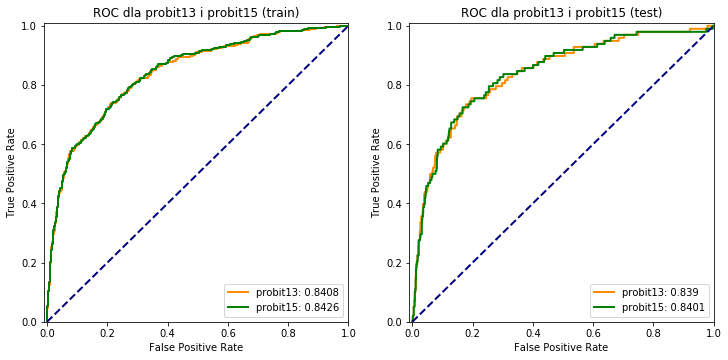

In [115]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obliczenie punktów potrzebnych do narysowania krzywej ROC
# funkcja roc_curve zwraca trzy serie danych, fpr, tpr oraz poziomy progów odcięcia
## train
probs = resprobit13.predict(train)
probs1 = resprobit15.predict(train)
y = train.bankrut.values.astype(float)
fpr, tpr, thresholds = roc_curve(y_true = y, y_score = probs)
fpr1, tpr1, thresholds1 = roc_curve(y_true = y, y_score = probs1)
## test
probs2 = resprobit13.predict(test)
probs3 = resprobit15.predict(test)
y2 = test.bankrut.values.astype(float)
fpr2, tpr2, thresholds2 = roc_curve(y_true = y2, y_score = probs2)
fpr3, tpr3, thresholds3 = roc_curve(y_true = y2, y_score = probs3)

# pole powierzchni pod krzywymi
## train
rocScore = round(roc_auc_score(y_true = y, y_score = probs), 4)
rocScore1 = round(roc_auc_score(y_true = y, y_score = probs1), 4)
## test
rocScore2 = round(roc_auc_score(y_true = y2, y_score = probs2), 4)
rocScore3 = round(roc_auc_score(y_true = y2, y_score = probs3), 4)

# Ustalanie wielkości rysunku
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5.5))

# Grubość krzywej
lw = 2

# krzywa ROC
## train
ax[0].plot(fpr, tpr, color = 'darkorange', lw = lw, label = 'probit13: {}'.format(rocScore))
ax[0].plot(fpr1, tpr1, color = 'green', lw = lw, label = 'probit15: {}'.format(rocScore1))
## test
ax[1].plot(fpr2, tpr2, color = 'darkorange', lw = lw, label = 'probit13: {}'.format(rocScore2))
ax[1].plot(fpr3, tpr3, color = 'green', lw = lw, label = 'probit15: {}'.format(rocScore3))


# krzywa 45 stopni jako punkt odniesienia
## train
ax[0].plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
## test
ax[1].plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')

# marginesy aby krzywa nie pokrywała się z osiami
## train
ax[0].set_xlim([-0.01, 1.0])
ax[0].set_ylim([0.0, 1.01])
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC dla probit13 i probit15 (train)')
ax[0].legend(loc = "lower right")
## test
ax[1].set_xlim([-0.01, 1.0])
ax[1].set_ylim([0.0, 1.01])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC dla probit13 i probit15 (test)')
ax[1].legend(loc = "lower right")
plt.show()

W przypadku zarówno próby tereningowej jak i testowej nieznacznie lepszy okazuje się model zawierający zmienną Altmana.

#### Tabela publikacyjna

In [116]:
'''from statsmodels.iolib.summary2 import summary_col'''

'from statsmodels.iolib.summary2 import summary_col'

In [117]:
'''# print
print(summary_col(results = [reslpm, resprobit, reslogit, resprobit13, resprobit15],
                  model_names = ['LPM', 'Probit ogólny', 'Logit ogólny', 'Probit 1', 'Probit 2'],
                  stars = True))'''

"# print\nprint(summary_col(results = [reslpm, resprobit, reslogit, resprobit13, resprobit15],\n                  model_names = ['LPM', 'Probit ogólny', 'Logit ogólny', 'Probit 1', 'Probit 2'],\n                  stars = True))"

In [118]:
'''# baza latex
print(summary_col(results = [reslpm, resprobit, reslogit, resprobit13, resprobit15],
                  model_names = ['LPM', 'Probit ogólny', 'Logit ogólny', 'Probit 1', 'Probit 2'],
                  stars = True).as_latex())'''

"# baza latex\nprint(summary_col(results = [reslpm, resprobit, reslogit, resprobit13, resprobit15],\n                  model_names = ['LPM', 'Probit ogólny', 'Logit ogólny', 'Probit 1', 'Probit 2'],\n                  stars = True).as_latex())"

##### Efekty cząstkowe<br/>
policzone dla średnich charakterystyk modelu probit13 i probit15.

In [119]:
me13 = resprobit13.get_margeff(at = 'mean', dummy = True)
print(me13.summary())

       Probit Marginal Effects       
Dep. Variable:                bankrut
Method:                          dydx
At:                              mean
                                        dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
I(KO_Aktywa ** 2)                     -0.0111      0.003     -4.213      0.000      -0.016      -0.006
I(Rozmiar ** 2)                       -0.0023      0.000     -5.704      0.000      -0.003      -0.002
KO_Aktywa                             -0.0577      0.008     -6.907      0.000      -0.074      -0.041
MarzaZyskuBrutto                      -0.0232      0.010     -2.330      0.020      -0.043      -0.004
PrzyrostSprzedazySpadek_BrakDanych     0.0858      0.009      9.047      0.000       0.067       0.104
ROA                                   -0.0486      0.013     -3.607      0.000      -0.075      -0.022
RotacjaZobowiazan       

In [120]:
print('Efekt cząstkowy dla Kapitał obrotowy/Aktywa: {}'.format(-0.0577 - 2 * (-0.0111) * train.KO_Aktywa.mean()))
print('Efekt cząstkowy dla Rozmiar: {}'.format(-0.0023 * train.Rozmiar.mean()))

Efekt cząstkowy dla Kapitał obrotowy/Aktywa: -0.05309028518357219
Efekt cząstkowy dla Rozmiar: -0.00958438573576471


In [121]:
print('Średnie KO/Aktywa: {},\nśredni rozmiar (logarytm naturalny sumy bilansowej: {},\nśredna Marża zysku brutto: {},\n\
średnie ROA: {},\nśredni cykl rotacji zobowiązań: {}.'.format(
round(train.KO_Aktywa.mean(), 4), round(train.Rozmiar.mean(), 4), round(train.MarzaZyskuBrutto.mean(), 4),
round(train.ROA.mean(), 4), int(round(train.RotacjaZobowiazan.mean(), 0))))

Średnie KO/Aktywa: 0.2076,
średni rozmiar (logarytm naturalny sumy bilansowej: 4.1671,
średna Marża zysku brutto: 0.0768,
średnie ROA: 0.0511,
średni cykl rotacji zobowiązań: 101.


Interpretacja dla spółki o powyższych charakterystykach:
 - jeżeli Kapitał obrotowy/Aktywa wzrośnie o jednostkę, prawdopodobieństwo bankructwa spadnie o 5.31 p. procentowych,
 - jeżeli Rozmiar (logarytm naturalny sumy bilansowej) wzrośnie o jednostkę, prawodopodobieństo bankructwa spadnie o 0.96 p. procentowych,
 - jeżeli Marża zysku brutto wzrośnie o jednostkę, prawdopodobienstwo bankructwa spadnie o 2.32 p. procentowego,
 - jeżeli zaobserwujemy spadek sprzedaży w stosunku do roku poprzedniego lub brak danych w tym zakresie,prawdopopodobieństwo bankructwa wzrośnie o 8.58 p. procentowych,
 - jeżeli ROA wzrośnie o jednostkę, prawdopodobieństwo bankructwa spadnie o 4.86 p. procentowych,
 - jeżeli cykl rotacji zobowiązań wydłuży się o jeden dzień, prawdopodobieństwo bankructwa wzrośnie o 0.004 p. procentowego.

##### Hipoteza poboczna: too big to fail

Oszacowanie parametru przy rozmiarze spółki mierzonym logarytmem naturalnym sumy bilansowej ma znak "-", co oznacza że jeżeli suma bilansowa wzrośnie o 1% to prawdopodobieństo bankructwa spadnie. Analogiczne wnioski można wyciągnąć na podstawie efektów cząstowych dla średnich charakterystyk, wzrostowi logarytmu naturalnego sumy bilansowej o jednostkę towarzyszy spadek prawdopodobienstwa bankructwa o 0.96 p. procentowych.

##### Hipoteza poboczna  o poprawieniu pewności predykcji w przypadku dodania zmiennej Altmana do modelu finalnego.

W celu zachowania pożądanych wyników predykcji (specyficzność > 0.95 przy max wrażlwiości) na zbiorze treningowym, optymalny poziom odcięcia został ustalony na 0.19. Clive, Granger i Pesaran (2000) za optymalny punkt odcięcia ($p^*$) wskazują $p^* = \frac{1}{1+\frac{\theta_1}{\theta_0}}$, gdzie $\theta_1$ jest kosztem błędu I rodzaju, tj. stratą z $\hat{p_i}<p^*|y_i=1$, a $\theta_0$ jest kosztem błędu II rodzaju, tj. stratą z $\hat{p_i}>p^*|y_i=0$. Chcąc przetestować progi odcięcia w zakresie 0.01 - 0.5 (Bi-Huei Tsai (2013) testowała granice 0.01 i 0.3, jednak dla kompletności wyników, w niniejszej pracy zdecydowano się rozszerzyć granice - powyżej 0.5 nie ma sensu, gdyż bankructwo jest zdarzeniem rzadkim), należy założyć, że punkt odcięcia dobierany jest w oparciu o $\theta_1$ i $\theta_0$, oraz że jest on optymalny. Zatem, jeżeli przyjmiemy arbitralne poziomy $p^*$, to z formuły $p^* = \frac{1}{1+\frac{\theta_1}{\theta_0}}$ możemy obliczyć koszty błędnych klasyfikacji. Koszty są niezbędne do obliczenia łącznego kosztu błędnych klasyfikacji równego (Bi-Huei Tsai (2013)):
\begin{equation*}
EMC = y_i*\theta_1*P(\hat{p_i}<p^*|y_i=1)+(1-y_i)*\theta_0*P(\hat{p_i}>p^*|y_i=0)
\end{equation*}<br/>
gdzie $y_i$ jest zaobserwowaną liczbą sukcesów (bankrutów), a $1-y_i$ jest zaobserwowaną liczbą porażek (nie bankrutów) - jeżeli byłaby to miara ex ante, y zastąpiłoby $\hat{y}$, czyli oszacowania.<br/>
Hipoteza jest następująca: $H_0: EMC_{probit13}>EMC_{probit15}$, gdzie probit13 to ostateczny model bez zmiennej Altmana, a probit15 to model uwzględniający zmienną Altmana.<br/>
W celu zweryfikowania hipotezy przeprowadzona zostanie procedura, oparta na tej zaproponowanej przez Bi_Huei Tsai (2013):
1. Losowanie tej samej proporcji "1" i "0" z powtórzeniami 1000 razy.
2. Oszacowanie probit13 i probit15 dla wylosowanego zbioru danych.
3. Wybór punktu odcięcia oraz $\theta_1$ i $\theta_0$ na jego podstawie dla wylosowanego zbioru danych.
4. Obliczenie $P(\hat{y_i}<p^*|y_i=1)$ oraz $P(\hat{y_i}>p^*|y_i=0)$ $EMC$ dla wylosowanego zbioru danych i progów odcięcia.
5. Przeprowadzenie testu na równość średnich $EMC$ dla każdego progu odcięcia.

##### Pętla bootstrapowa<br/>
pętla na moim komputerze wykonuje się około godziny, dlatego została wykonana raz, a jej wynik zapisany do pliku bootstrap.pkl<br/>
Ze względu na wygodę, notatnik uruchamiany jest opcją Kernel -> Restart & Run all, co powoduje utratę wszystkich komórek ze wcześniejszymi outputami. Raport generowany przez pętle bootstrapową został z tego powodu zapisany w osobnym pliku. W celu powtórzenia badania należy odkomentować dwie poniższe komórki.

In [122]:
'''# moduł do mierzenia czasu
import time
# moduł potrzebny do podnoszenia błędnu w momencie błędu konwergencji funkcji wiarygodności (blok try, except w pętli)
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('error', ConvergenceWarning)'''

"# moduł do mierzenia czasu\nimport time\n# moduł potrzebny do podnoszenia błędnu w momencie błędu konwergencji funkcji wiarygodności (blok try, except w pętli)\nimport warnings\nfrom statsmodels.tools.sm_exceptions import ConvergenceWarning\nwarnings.simplefilter('error', ConvergenceWarning)"

In [123]:
'''# zmienne z probit13 bez stałej, bo ta obliczana jest automatycznie
zmn = resprobit13.params.index.tolist()
zmn.remove('Intercept')

start = time.time()

# proporcje y_1 "1" i y_0 "0"
y_1 = bankruci.shape[0]/(bankruci.shape[0]+niebankruci.shape[0])
y_0 = 1-y_1
# słownik rezultatów pętli bootstrapowej
bootstrapresults = {}

for cut in range(1,51):
    # float nie może być argumentem funkcji range()
    theta_1 = (1-cut/100)/(cut/100)
    theta_0 = 1
    i = 1
    
    # listy do zapisu wyników dla pojedynczych punktów odcięcia
    EMC_BA_list = []
    EMC_A_list = []
    
    start1 = time.time()
    while i < 1001:
        # jeżeli funkcja wiarygodności nie może zostać zoptymalizowana, należy powtórzyć procedurę (o tym mówi inkrementacja i)
        try:
            # zbiór danych - losowanie ze zwracaniem sałej proporcji "1" i "0"
            dta = pd.concat(objs = [niebankruci.sample(frac = 1, replace = True),
                                    bankruci.sample(frac = 1, replace = True)], axis = 0)
            # szacowanie probitu13
            BA = probit('bankrut~{}'.format('+'.join(zmn)), dta).fit(disp = False)
            # szacowanie probitu15
            A = probit('bankrut~Zscore+{}'.format('+'.join(zmn)), dta).fit(disp = False)
            # tablice klasyfikacjyjne dla probitu13 i probitu15 
            tBA = BA.pred_table(cut/100).T
            tA = A.pred_table(cut/100).T
            # prawdopodobieństwa błędów I i II rodzaju dla probitu13 i probitu15
            IBA = tBA[0,1]/(tBA[0,1]+tBA[1,1])
            IIBA = tBA[1,0]/(tBA[0,0]+tBA[0,1])
            IA = tA[0,1]/(tA[0,1]+tA[1,1])
            IIA = tA[1,0]/(tA[0,0]+tA[0,1])
            
            # obliczenie EMC dla probitu13 i probitu15
            EMC_BA = y_1 * theta_1 * IBA + y_0 * theta_0 * IIBA
            EMC_A = y_1 * theta_1 * IA + y_0 * theta_0 * IIA
            
            # zapisanie wyników do list
            EMC_BA_list.append(EMC_BA)
            EMC_A_list.append(EMC_A)
            
            # inkrementacja warunku pętli while
            i += 1
        except:
            pass
    bootstrapresults.update({cut/100 : pd.concat(objs = [pd.Series(EMC_BA_list), pd.Series(EMC_A_list)],axis = 1, names = ['probit13', 'probit15'])})
    end1 = time.time()
    print('cutoff: {}, czas wykonania(s): {}'.format(cut/100, end1 - start1))

end = time.time()
print('czas wykonania całej pętli: {}'.format(end - start))'''

'# zmienne z probit13 bez stałej, bo ta obliczana jest automatycznie\nzmn = resprobit13.params.index.tolist()\nzmn.remove(\'Intercept\')\n\nstart = time.time()\n\n# proporcje y_1 "1" i y_0 "0"\ny_1 = bankruci.shape[0]/(bankruci.shape[0]+niebankruci.shape[0])\ny_0 = 1-y_1\n# słownik rezultatów pętli bootstrapowej\nbootstrapresults = {}\n\nfor cut in range(1,51):\n    # float nie może być argumentem funkcji range()\n    theta_1 = (1-cut/100)/(cut/100)\n    theta_0 = 1\n    i = 1\n    \n    # listy do zapisu wyników dla pojedynczych punktów odcięcia\n    EMC_BA_list = []\n    EMC_A_list = []\n    \n    start1 = time.time()\n    while i < 1001:\n        # jeżeli funkcja wiarygodności nie może zostać zoptymalizowana, należy powtórzyć procedurę (o tym mówi inkrementacja i)\n        try:\n            # zbiór danych - losowanie ze zwracaniem sałej proporcji "1" i "0"\n            dta = pd.concat(objs = [niebankruci.sample(frac = 1, replace = True),\n                                    bankruci

In [124]:
'''import pickle
# JEŻELI PLIK bootstrap.pkl JUŻ JEST, NIE URUCHAMIAĆ TEJ KOMÓRKI W PRZECIWNYM RAZIE WYNIK ZOSTANIE NADPISANY!!!
# zapis wyników bootstrapu jako pickle
with open("bootstrap.pkl", "wb") as fp:
    # Zapisujemy obiekt do wskaźnika pliku
    pickle.dump(bootstrapresults, fp)'''

'import pickle\n# JEŻELI PLIK bootstrap.pkl JUŻ JEST, NIE URUCHAMIAĆ TEJ KOMÓRKI W PRZECIWNYM RAZIE WYNIK ZOSTANIE NADPISANY!!!\n# zapis wyników bootstrapu jako pickle\nwith open("bootstrap.pkl", "wb") as fp:\n    # Zapisujemy obiekt do wskaźnika pliku\n    pickle.dump(bootstrapresults, fp)'

In [125]:
import pickle
# wczytanie wyników bootstrapu jako pickle
with open('bootstrap.pkl', "rb") as fp:
    bootstrapresults = pickle.load(fp)

In [126]:
# listy, w których zostaną zapisane wyniki
stats = []
critics = []
pvals = []
showAll = False

for k in list(bootstrapresults.keys()):
    # test
    # kolumna 0 to średni EMC dla probitu13, kolumna 1 to średni EMC dla probitu15
    s, crt, p = popMeanTest(a = np.array(bootstrapresults[k].iloc[:, 0]), 
                           b = np.array(bootstrapresults[k].iloc[:, 1]),
                            alfa = 0.05, alternative = 'one-sided')
    
    # zapisanie wyników dla pojedynczego cutoffu
    stats.append(round(s,4))
    critics.append(round(crt,4))
    pvals.append(round(p,4))

# agregacja wyników
srednie = pd.DataFrame(data = {'cutoff':list(bootstrapresults.keys()), 'U':stats, 'wartość krytyczna':critics, 'p_value':np.round(pvals, 4)})

if not showAll:
    # usunięcie z obiektu zmiennych z p > 0.05 (przyjętą H0 o równości średnich)
    srednie = srednie.where(srednie['p_value'] > 0.05).dropna()
    #srednie = srednie.where(srednie['U'] > 0).dropna()
    
    # porządkowanie indeksów
    srednie.reset_index(inplace = True, drop = True)

display(srednie)

,cutoff,U,wartość krytyczna,p_value
0,0.01,-0.1303,1.6449,0.4482
1,0.06,1.2859,1.6449,0.0992
2,0.07,0.3911,1.6449,0.3479
3,0.08,-0.1501,1.6449,0.4404
4,0.09,-0.5970,1.6449,0.2752
5,0.10,0.4698,1.6449,0.3192
6,0.11,0.6641,1.6449,0.2533
7,0.12,0.4529,1.6449,0.3253
8,0.16,1.0468,1.6449,0.1476
9,0.17,-0.0196,1.6449,0.4922


Wnioski: dla punktów odcięcia 0.02, 0.03, 0.4, 0.5, 0.13, 0.14, 0.15, 0.26, 0.29, 0.3 oraz 0.31 średnia EMC dla probitu15 jest istotnie niższa statystycznie na poziomie alfa = 5%, zatem w przypadkach osób, dla których optymalny punkt odcięcia znajduje się na liście wyżej wymienionej, modelem lepszym będzie model probit15 (zawierający zmienną Altmana) <br/>
W świetle wyników nie można przesądzić o wyższości któregoś z modeli, a wybór między nimi powinien być dokonywany na podstawie kosztów błędów I i II rodzaju badacza.

In [127]:
# zapis wyników do pliku -> łatwiej się tworzy tabelę latexową z csv
# srednie.to_csv(r'srednie.csv')